## ANALISIS EXPLORATORIO DE DATOS - EDA

Para nuestro análisis de datos utilizamos dos datasets, producto del proceso ETL realizado anteriormente:

- **dataset_nacional.csv** el cual contiene los datos de los ingresos, media de bajada en mbps, los diferentes tipos de velocidades y tecnologías, clasificados por años y trimestres, de Argentina.

- **dataset_provincias.csv** el cual contiene los datos de la media de bajada en mbps, los diferentes tipos de velocidades y tecnologías, clasificados por anos, trimestres y Provincias de Argentina.

### Importamos las librerías a utilizar

In [95]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import matplotlib.pyplot as plt # módulo graficador
import seaborn as sns # módulo graficador
import plotly
import plotly.express as px
import warnings
import json
warnings.filterwarnings('ignore')

### Lectura del dataset: dataset_nacional.csv

In [4]:
dfNacional = pd.read_csv('data/dataset_nacional.csv', sep=';', encoding='utf-8')
dfNacional.head()

anio  trimestre  ingresos  media_bajada_mbps     adsl  cablemodem  \
0  2022          3  67055930              62.46  1395277     6031970   
1  2022          2  60335724              58.44  1468333     5979214   
2  2022          1  55589997              55.11  1533240     6073426   
3  2021          4  45467887              52.34  1657615     5984240   
4  2021          3  42999944              48.46  1950631     5826257   

   fibra_optica  wireless  otras_tecnologias  total_tecnologia  ...  \
0       2871541     55711              23523          11091128  ...   
1       2723285    556243             231609          10958684  ...   
2       2219533    545814             251996          10624009  ...   
3       2072236    523107             252596          10489794  ...   
4       1566048    492415              25019          10085541  ...   

   512kbps_1mbps  1mbps_6mbps  6mbps_10mbps  10mbps_20mbps  20mbps_30mbps  \
0          96727      1161370       1151906         823505         479822   
1          99498      1193090       1197030         856562         485321   
2          10484      1263273       1209148         967508         509830   
3          28521      1413208       1245333         976539         558358   
4          41437      2550229       1095772         710122         536364   

    30mbps  otras_velocidades  total_velocidad  accesos_100_hogares  \
0  6995750             349035         11091128                76.64   
1  6741922             351594         10958684                75.97   
2  6336187             198333         10624009                73.88   
3  6032322             194251         10489794                73.18   
4  4948174             163269         10085541                70.58   

   accesos_100_hab  
0            23.95  
1            23.72  
2            23.05  
3            22.81  
4            21.98  

[5 rows x 21 columns]

### Determinamos el tamaño de los datos
- ¿Qué tipo de dato son las variables del conjunto de datos dfNacional?

In [5]:
dfNacional.dtypes

anio                     int64
trimestre                int64
ingresos                 int64
media_bajada_mbps      float64
adsl                     int64
cablemodem               int64
fibra_optica             int64
wireless                 int64
otras_tecnologias        int64
total_tecnologia         int64
512kbps                  int64
512kbps_1mbps            int64
1mbps_6mbps              int64
6mbps_10mbps             int64
10mbps_20mbps            int64
20mbps_30mbps            int64
30mbps                   int64
otras_velocidades        int64
total_velocidad          int64
accesos_100_hogares    float64
accesos_100_hab        float64
dtype: object

- ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos dfNacional?

In [6]:
dfNacional.dtypes.value_counts()

int64      18
float64     3
Name: count, dtype: int64

- ¿Cuántas variables y observaciones tenemos en el conjunto de datos dfNacional?

In [7]:
dfNacional.shape

(35, 21)

- ¿Existen valores nulos explícitos en el conjunto de datos dfNacional?

In [8]:
dfNacional.isnull().any()

anio                   False
trimestre              False
ingresos               False
media_bajada_mbps      False
adsl                   False
cablemodem             False
fibra_optica           False
wireless               False
otras_tecnologias      False
total_tecnologia       False
512kbps                False
512kbps_1mbps          False
1mbps_6mbps            False
6mbps_10mbps           False
10mbps_20mbps          False
20mbps_30mbps          False
30mbps                 False
otras_velocidades      False
total_velocidad        False
accesos_100_hogares    False
accesos_100_hab        False
dtype: bool

## Conteos y proporciones
- ¿Qué estadísticos describen el conjunto de datos dfNacional?

In [9]:
dfNacional.describe()

anio  trimestre      ingresos  media_bajada_mbps          adsl  \
count    35.000000  35.000000  3.500000e+01          35.000000  3.500000e+01   
mean   2017.885714   2.457143  2.058845e+07          21.827143  3.040425e+06   
std       2.564135   1.120474  1.774214e+07          19.230717  8.354122e+05   
min    2014.000000   1.000000  2.984054e+06           3.620000  1.395277e+06   
25%    2016.000000   1.500000  6.235543e+06           5.250000  2.279711e+06   
50%    2018.000000   2.000000  1.431947e+07          13.850000  3.557216e+06   
75%    2020.000000   3.000000  3.204996e+07          39.495000  3.723156e+06   
max    2022.000000   4.000000  6.705593e+07          62.460000  3.803024e+06   

         cablemodem  fibra_optica       wireless  otras_tecnologias  \
count  3.500000e+01  3.500000e+01      35.000000          35.000000   
mean   4.122601e+06  7.390627e+05  224909.857143      123193.828571   
std    1.225277e+06  7.861772e+05  177544.571827       96972.324891   
min    2.407330e+06  1.391870e+05    1653.000000         543.000000   
25%    2.966749e+06  1.679880e+05   81766.000000       55934.000000   
50%    4.038141e+06  2.262850e+05  155775.000000       71573.000000   
75%    5.132233e+06  1.138802e+06  364500.000000      239312.500000   
max    6.073426e+06  2.871541e+06  556243.000000      265328.000000   

       total_tecnologia  ...  512kbps_1mbps   1mbps_6mbps  6mbps_10mbps  \
count      3.500000e+01  ...      35.000000  3.500000e+01  3.500000e+01   
mean       8.297800e+06  ...  224413.371429  3.623279e+06  8.975174e+05   
std        1.399611e+06  ...  208186.625270  1.292407e+06  2.462911e+05   
min        6.398398e+06  ...    2898.000000  1.161370e+06  2.891820e+05   
25%        7.057455e+06  ...   41849.000000  2.643902e+06  7.799985e+05   
50%        8.110444e+06  ...  215406.000000  3.428759e+06  9.769560e+05   
75%        9.260442e+06  ...  339317.000000  4.996999e+06  1.057958e+06   
max        1.109113e+07  ...  687619.000000  5.153437e+06  1.245333e+06   

       10mbps_20mbps  20mbps_30mbps        30mbps  otras_velocidades  \
count   3.500000e+01   3.500000e+01  3.500000e+01          35.000000   
mean    9.190145e+05   5.037122e+05  1.900309e+06      115141.342857   
std     4.881587e+05   4.717638e+05  2.357935e+06      114321.115210   
min     1.011270e+05   3.450000e+02  1.159500e+04           0.000000   
25%     6.674615e+05   5.082050e+04  2.620000e+04           0.000000   
50%     8.144700e+05   5.098300e+05  4.443910e+05      155145.000000   
75%     1.149810e+06   6.396735e+05  3.882480e+06      196292.000000   
max     2.068087e+06   1.688748e+06  6.995750e+06      351594.000000   

       total_velocidad  accesos_100_hogares  accesos_100_hab  
count     3.500000e+01            35.000000        35.000000  
mean      8.255731e+06            60.275429        18.606286  
std       1.442421e+06             8.148909         2.662968  
min       6.272846e+06            49.550000        15.050000  
25%       7.029346e+06            52.985000        16.245000  
50%       8.110444e+06            59.160000        18.240000  
75%       9.260442e+06            66.050000        20.475000  
max       1.109113e+07            76.640000        23.950000  

[8 rows x 21 columns]

**OBSERVACIONES:** 

- El dataframe dfNacional contiene 35 observaciones, 21 variables de las cuales 18 son tipo int y 3 tipo float. Se puede verificar que no contiene valores nulos.

- El dataframe contiene información relacionada con los ingresos por la prestación de servicio de internet a nivel nacional, así como también la media de bajada en mbps, accesos a hogares y habitantes, los números de accesos por las diferentes velocidades y tecnologías a lo largo de los años y trimestres. 

- **Para nuestro análisis tomamos los últimos 5 años registrados, es decir, desde el 2018 hasta el 2022**.

- **También es importante acotar que no se cuenta con información del último trimestre del 2022**.

**Descripción de columnas:**

- "anio": Representa el año en el que se registró la medición.
- "trimestre": Indica el trimestre en el que se realizó la medición.
- "ingresos": Monto en Pesos Argentinos por la prestación del servicio de internet.
- "media_bajada_mbps": Valor medio de velocidad de bajada en megabits por segundo (Mbps).
- "adsl": Cantidad de accesos por ADSL.
- "cablemodem": Cantidad de accesos por Cable Modem.
- "fibra_optica": Cantidad de accesos por Fibra Óptica.
- "wireless": Cantidad de accesos por Wireless.
- "otras_tecnologias": Cantidad de accesos por Otras Tecnologías ().
- "total_tecnologia": Cantidad de accesos Total por tecnología.
- "512kbps": Cantidad de accesos por 512 Kbps.
- "512kbps_1mbps": Cantidad de accesos desde 512 Kbps hasta 1 Mbps.
- "1mbps_6mbps": Cantidad de accesos desde 1 Mbps hasta 6 Mbps.
- "6mbps_10mbps": Cantidad de accesos desde 6 Mbps hasta 10 Mbps.
- "10mbps_20mbps": Cantidad de accesos desde 10 Mbps hasta 20 Mbps.
- "20mbps_30mbps": Cantidad de accesos desde 20 Mbps hasta 30 Mbps.
- "30mbps": Cantidad de accesos más de 30 Mbps.
- "otras_velocidades": Cantidad de accesos por otras velocidades.
- "total_velocidad": Cantidad de accesos Total por Velocidad.
- "accesos_100_hogares": Valor de accesos por cada 100 hogares.
- "accesos_100_hab": Valos de accesos por cada 100 habitantes.

In [10]:
# Seleccionamos las observaciones desde el año 2018 hasta 2022
dfNacional =  dfNacional[dfNacional.anio >= 2018]

### 1 - Accesos Totales Nacionales a Internet Fijo por Velocidad

1.1 - Accesos a Internet Fijo por Velocidad Hasta 512 Kbps - Anual

In [11]:
print("Valores mínimos y máximos de la Velocidad hasta 512 Kbps:")
print(dfNacional.groupby('anio').agg({'512kbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad hasta 512 Kbps:
     512kbps        
         min     max
anio                
2018    5675   13874
2019   20279  241713
2020    3951   41038
2021   39487   41262
2022    3489   33667


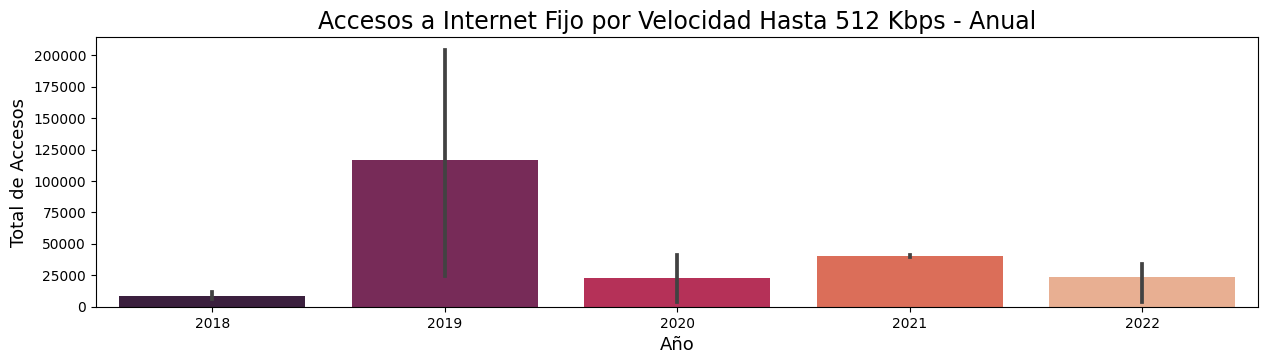

In [12]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='512kbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad Hasta 512 Kbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2022 se registró el valor mínimo de accesos hasta 512 Kbps: 3.489
- En el año 2019 se registró el valor máximo de accesos hasta 512 Kbps: 241.713

El año 2019 fue el que tuvo mayores cambios debido al tema pandemia. El acceso a internet independientemente del tipo de velocidad tuvo una mayor demanda ya que por motivos academicos y laborales, fue un recurso necesario.

1.2 - Accesos a Internet Fijo por Velocidad entre 512 Kbps y 1 Mbps - Anual

In [13]:
print("Valores mínimos y máximos de la Velocidad entre 512 Kbps y 1Mbps:")
print(dfNacional.groupby('anio').agg({'512kbps_1mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad entre 512 Kbps y 1Mbps:
     512kbps_1mbps        
               min     max
anio                      
2018        201196  220589
2019          2898  195706
2020          4869   44005
2021         28521   42024
2022         10484   99498


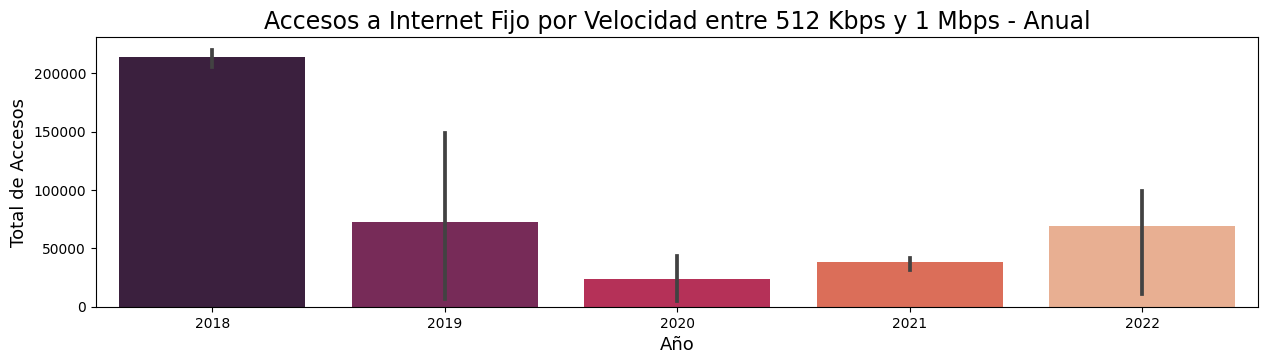

In [14]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='512kbps_1mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad entre 512 Kbps y 1 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2019 se registró el valor mínimo de accesos entre 512 Kbps y 1 Mbps: 2.898
- En el año 2018 se registró el valor máximo de accesos entre 512 Kbps y 1 Mbps: 220.589

1.3 - Accesos a Internet Fijo por Velocidad entre 1 Mbps y 6 Mbps - Anual

In [15]:
print("Valores mínimos y máximos de la Velocidad entre 1 Mbps y 6 Mbps:")
print(dfNacional.groupby('anio').agg({'1mbps_6mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad entre 1 Mbps y 6 Mbps:
     1mbps_6mbps         
             min      max
anio                     
2018     3272724  3401277
2019     2792307  3444458
2020     2622638  2651502
2021     1413208  2593477
2022     1161370  1263273


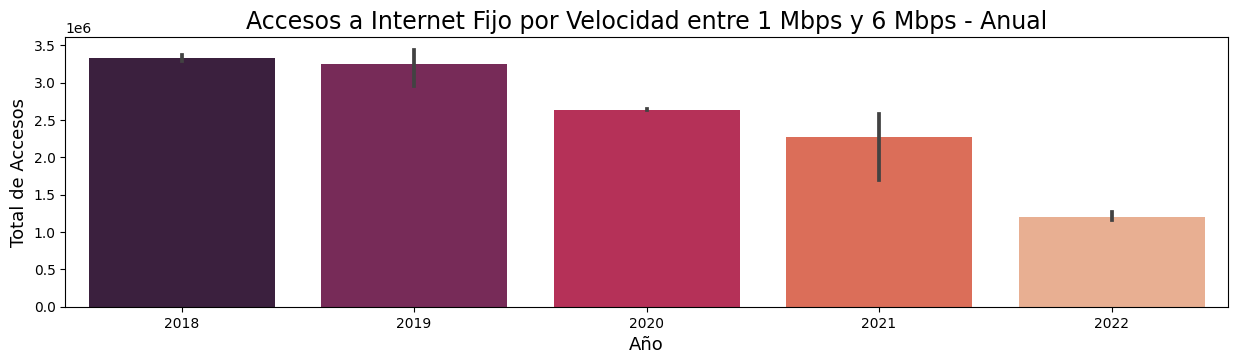

In [16]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='1mbps_6mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad entre 1 Mbps y 6 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2022 se registró el valor mínimo de accesos entre 1 Mbps y 6 Mbps: 116.1370
- En el año 2019 se registró el valor máximo de accesos entre 1 Mbps y 6 Mbps: 344.4458


1.4 - Accesos a Internet Fijo por Velocidad entre 6 Mbps y 10 Mbps - Anual

In [17]:
print("Valores mínimos y máximos de la Velocidad entre 6 Mbps y 10 Mbps:")
print(dfNacional.groupby('anio').agg({'6mbps_10mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad entre 6 Mbps y 10 Mbps:
     6mbps_10mbps         
              min      max
anio                      
2018       859413   979416
2019       871142  1046128
2020      1022014  1073875
2021      1072722  1245333
2022      1151906  1209148


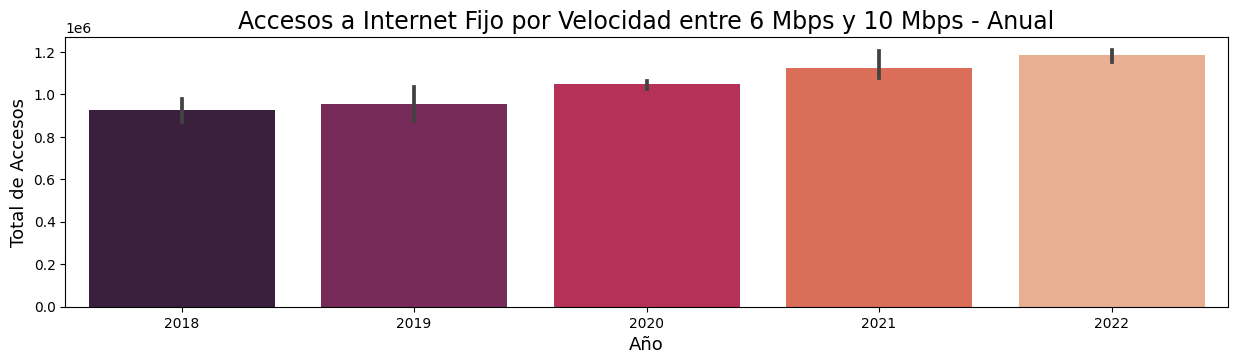

In [18]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='6mbps_10mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad entre 6 Mbps y 10 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos entre 6 Mbps y 10 Mbps: 85.9413
- En el año 2019 se registró el valor máximo de accesos entre 6 Mbps y 10 Mbps: 1.245.333

1.5 - Accesos a Internet Fijo por Velocidad entre 10 Mbps y 20 Mbps - Anual

In [19]:
print("Valores mínimos y máximos de la Velocidad entre 10 Mbps y 20 Mbps:")
print(dfNacional.groupby('anio').agg({'10mbps_20mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad entre 10 Mbps y 20 Mbps:
     10mbps_20mbps         
               min      max
anio                       
2018       1472634  2068087
2019        806466  1464748
2020        786595   814470
2021        693277   976539
2022        823505   967508


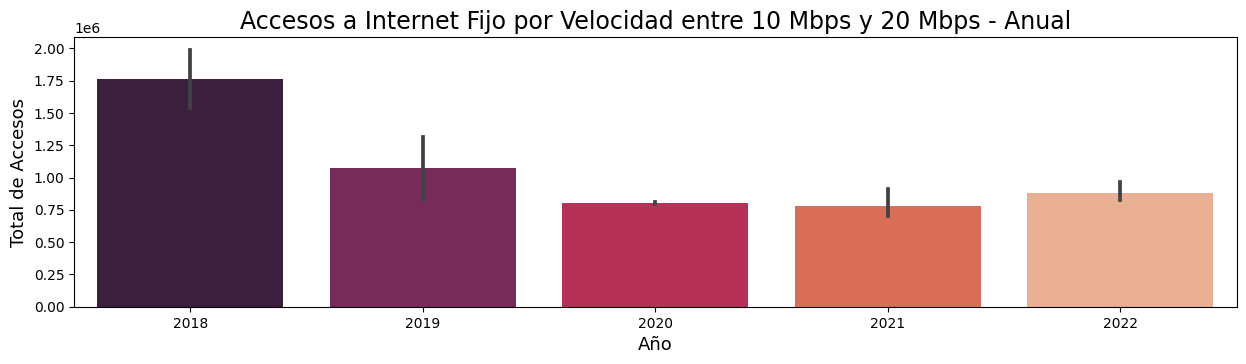

In [20]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='10mbps_20mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad entre 10 Mbps y 20 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2021 se registró el valor mínimo de accesos entre 10 Mbps y 20 Mbps: 693.277
- En el año 2018 se registró el valor máximo de accesos 10 Mbps y 20 Mbps: 2.068.087

1.6 - Accesos a Internet Fijo por Velocidad entre 20 Mbps y 30 Mbps - Anual

In [21]:
print("Valores mínimos y máximos de la Velocidad entre 20 Mbps y 30 Mbps:")
print(dfNacional.groupby('anio').agg({'20mbps_30mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad entre 20 Mbps y 30 Mbps:
     20mbps_30mbps         
               min      max
anio                       
2018        862010  1688748
2019       1004083  1250366
2020        523437   582420
2021        536364   647401
2022        479822   509830


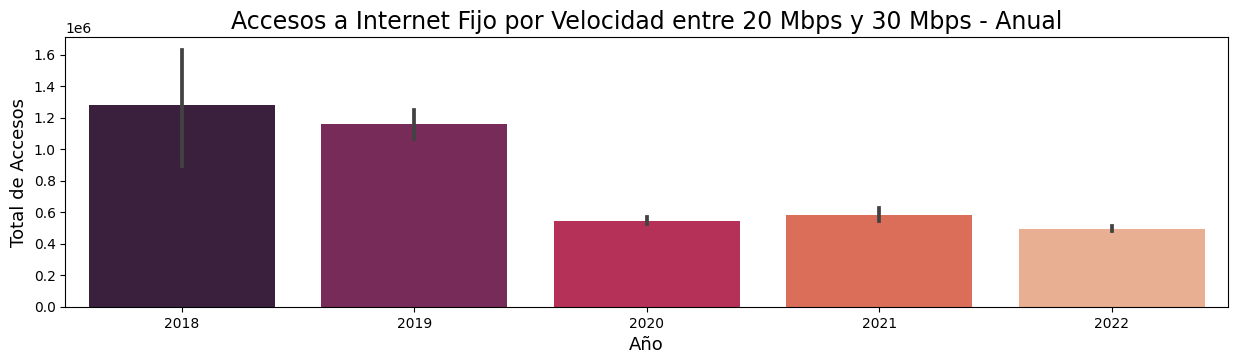

In [22]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='20mbps_30mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad entre 20 Mbps y 30 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2022 se registró el valor mínimo de accesos entre 20 Mbps y 30 Mbps: 479.822
- En el año 2018 se registró el valor máximo de accesos entre 20 Mbps y 30 Mbps: 1.688.748

1.7 - Accesos a Internet Fijo por Velocidad más de 30 Mbps - Anual

In [23]:
print("Valores mínimos y máximos de la Velocidad más de 30 Mbps:")
print(dfNacional.groupby('anio').agg({'30mbps': ['min', 'max']}))

Valores mínimos y máximos de la Velocidad más de 30 Mbps:
       30mbps         
          min      max
anio                  
2018   397977   599579
2019  1138728  2830746
2020  3500882  4239237
2021  4379965  6032322
2022  6336187  6995750


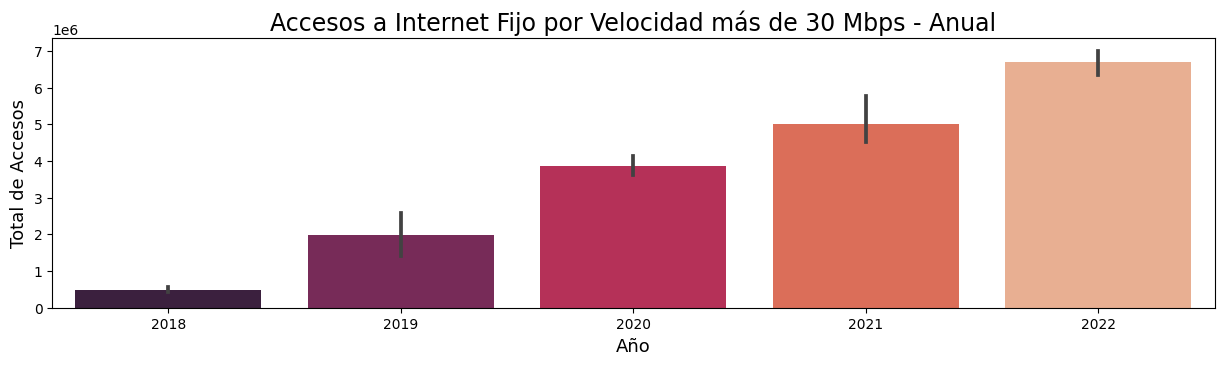

In [24]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='30mbps', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad más de 30 Mbps - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos más de 30 Mbps: 397.977
- En el año 2022 se registró el valor máximo de accesos más de 30 Mbps: 6.995.750

1.8- Accesos a Internet Fijo por Otras Velocidades - Anual

In [25]:
print("Valores mínimos y máximos de la Otras Velocidades:")
print(dfNacional.groupby('anio').agg({'otras_velocidades': ['min', 'max']}))

Valores mínimos y máximos de la Otras Velocidades:
     otras_velocidades        
                   min     max
anio                          
2018            152388  238455
2019             12657  247983
2020            185102  201777
2021            163269  194251
2022            198333  351594


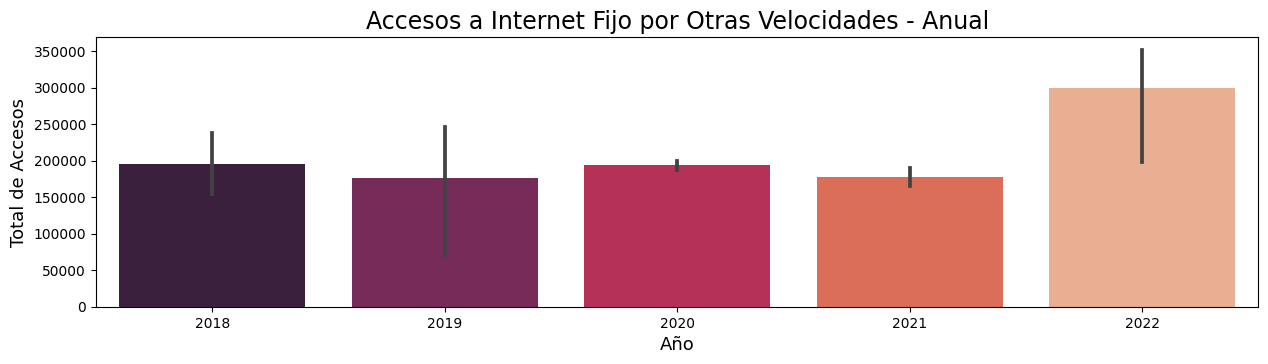

In [26]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='otras_velocidades', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Otras Velocidades - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2019 se registró el valor mínimo de accesos por otras velocidades: 12.657
- En el año 2022 se registró el valor máximo de accesos por otras velocidades: 351.594

1.9 - Total de Accesos a Internet Fijo por Velocidad - Trimestral

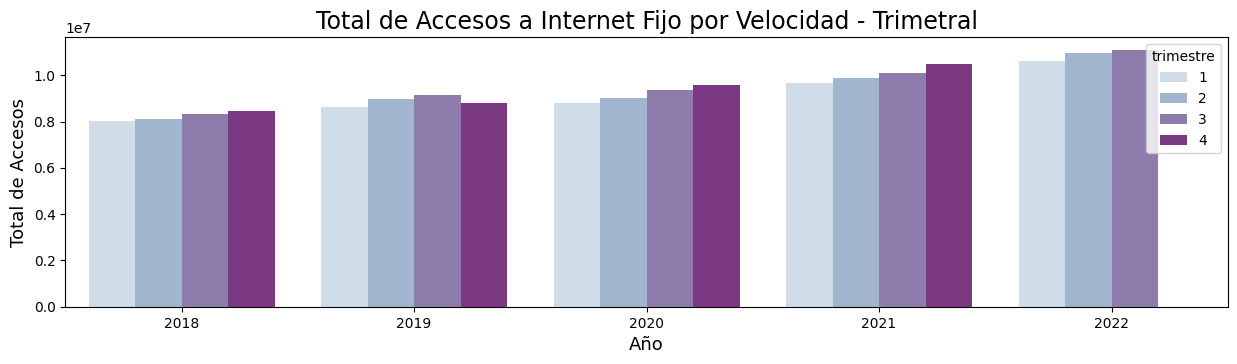

In [27]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='total_velocidad',data=dfNacional, hue='trimestre',palette = 'BuPu')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Total de Accesos a Internet Fijo por Velocidad - Trimetral', fontsize=17)
plt.show()

- Cuál fue la velocidad con mayor demanda por los clientes en el Año 2022?

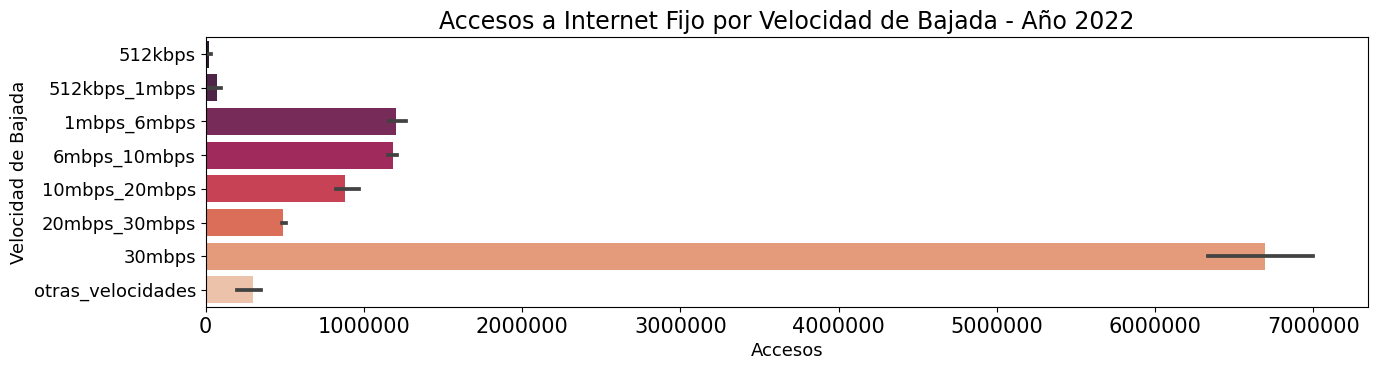

In [28]:
# Cuál fue la velocidad con mayor demanda por los clientes en el Año 2022?
dataVelNacAnio=dfNacional[dfNacional.anio == 2022]
dataVelNacAnio = pd.melt(dataVelNacAnio, id_vars=['anio','trimestre','total_velocidad'], value_vars = ['512kbps','512kbps_1mbps','1mbps_6mbps','6mbps_10mbps','10mbps_20mbps', '20mbps_30mbps', '30mbps','otras_velocidades'], var_name ='Velocidad de Bajada', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataVelNacAnio, y='Velocidad de Bajada', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Velocidad de Bajada', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad de Bajada - Año 2022', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la velocidad con mayor demanda por los clientes en el Año 2021?

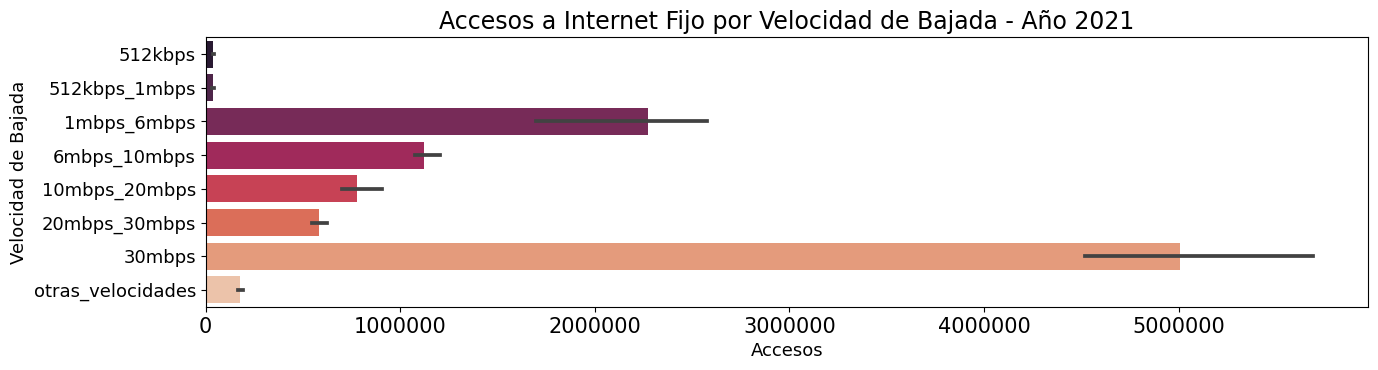

In [72]:
# Cuál fue la velocidad con mayor demanda por los clientes en el Año 2021?
dataVelNacAnio=dfNacional[dfNacional.anio == 2021]
dataVelNacAnio = pd.melt(dataVelNacAnio, id_vars=['anio','trimestre','total_velocidad'], value_vars = ['512kbps','512kbps_1mbps','1mbps_6mbps','6mbps_10mbps','10mbps_20mbps', '20mbps_30mbps', '30mbps','otras_velocidades'], var_name ='Velocidad de Bajada', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataVelNacAnio, y='Velocidad de Bajada', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Velocidad de Bajada', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad de Bajada - Año 2021', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la velocidad con mayor demanda por los clientes en el Año 2020?

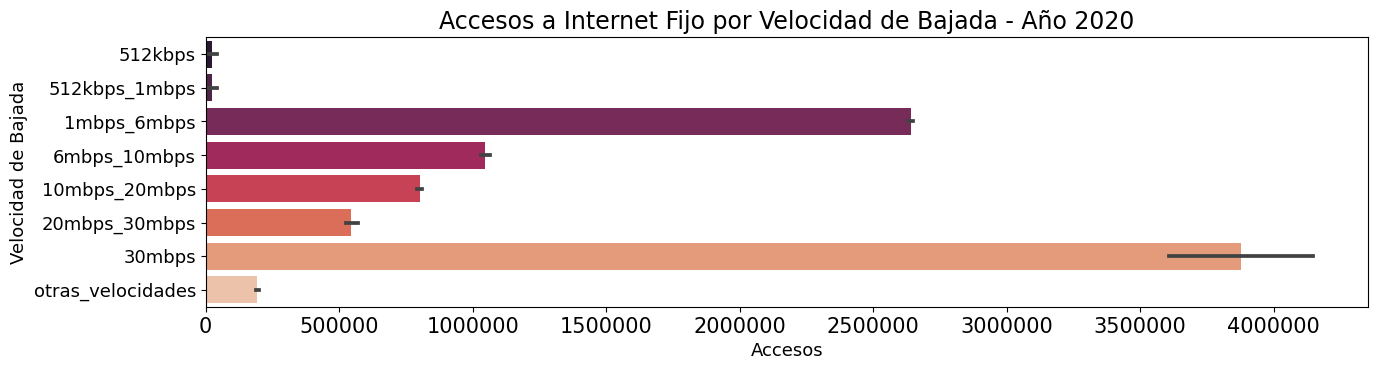

In [76]:
# Cuál fue la velocidad con mayor demanda por los clientes en el Año 2020?
dataVelNacAnio=dfNacional[dfNacional.anio == 2020]
dataVelNacAnio = pd.melt(dataVelNacAnio, id_vars=['anio','trimestre','total_velocidad'], value_vars = ['512kbps','512kbps_1mbps','1mbps_6mbps','6mbps_10mbps','10mbps_20mbps', '20mbps_30mbps', '30mbps','otras_velocidades'], var_name ='Velocidad de Bajada', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataVelNacAnio, y='Velocidad de Bajada', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Velocidad de Bajada', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad de Bajada - Año 2020', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la velocidad con mayor demanda por los clientes en el Año 2019?

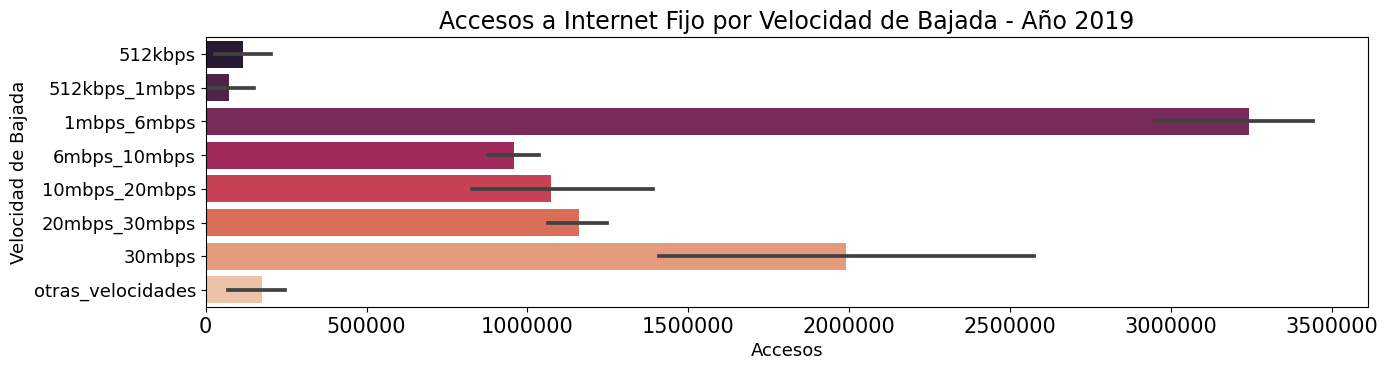

In [77]:
# Cuál fue la velocidad con mayor demanda por los clientes en el Año 2019?
dataVelNacAnio=dfNacional[dfNacional.anio == 2019]
dataVelNacAnio = pd.melt(dataVelNacAnio, id_vars=['anio','trimestre','total_velocidad'], value_vars = ['512kbps','512kbps_1mbps','1mbps_6mbps','6mbps_10mbps','10mbps_20mbps', '20mbps_30mbps', '30mbps','otras_velocidades'], var_name ='Velocidad de Bajada', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataVelNacAnio, y='Velocidad de Bajada', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Velocidad de Bajada', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad de Bajada - Año 2019', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la velocidad con mayor demanda por los clientes en el Año 2018?

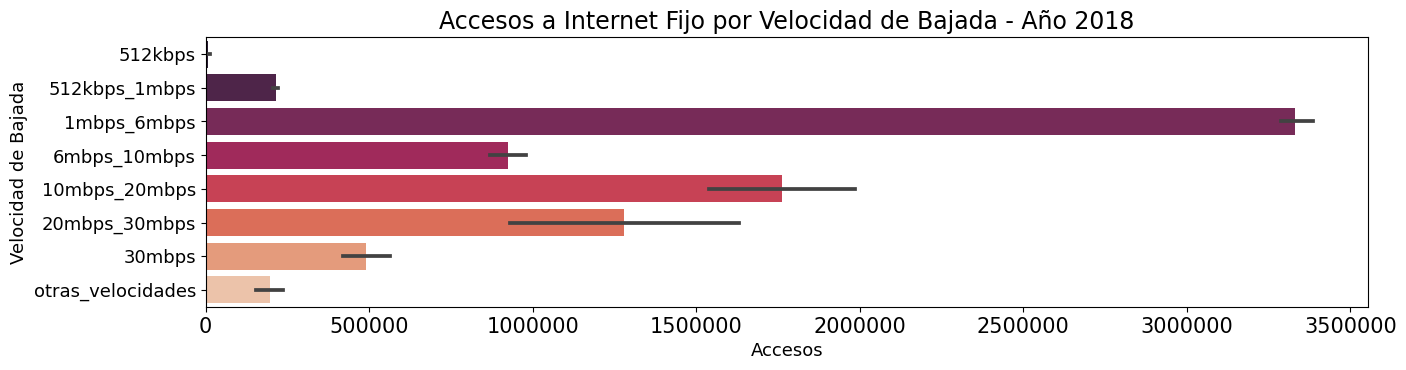

In [78]:
# Cuál fue la velocidad con mayor demanda por los clientes en el Año 2018?
dataVelNacAnio=dfNacional[dfNacional.anio == 2018]
dataVelNacAnio = pd.melt(dataVelNacAnio, id_vars=['anio','trimestre','total_velocidad'], value_vars = ['512kbps','512kbps_1mbps','1mbps_6mbps','6mbps_10mbps','10mbps_20mbps', '20mbps_30mbps', '30mbps','otras_velocidades'], var_name ='Velocidad de Bajada', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataVelNacAnio, y='Velocidad de Bajada', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Velocidad de Bajada', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Velocidad de Bajada - Año 2018', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

**OBSERVACIONES**

- Entre los años 2018 y 2019 la velocidad entre 1 Mbps hasta 6 Mbps tuvo mayor demanda por los usuarios. Pero a partir del 2018 se puede observar una gran disminución de la cantidad de accesos para este segmento.
- En cambio, la velocidad de más de 30 Mbps tuvo una demanda exponencial el año 2019, la cual no ha parado, esto se debe a la situación Pandemia, la cual cambió la dinámica laboral y académica, donde los usuarios requieren mayor velocidad y estabilidad en sus conexiones.

### 2 - Accesos Totales Nacionales a Internet fijo por Tecnología

2.1 - Accesos a Internet Fijo por Tecnología ADSL - Anual

In [29]:
print("Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología ADSL:")
print(dfNacional.groupby('anio').agg({'adsl': ['min', 'max']}))

Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología ADSL:
         adsl         
          min      max
anio                  
2018  3329027  3574294
2019  2414575  3132789
2020  2213949  2299457
2021  1657615  2175211
2022  1395277  1533240


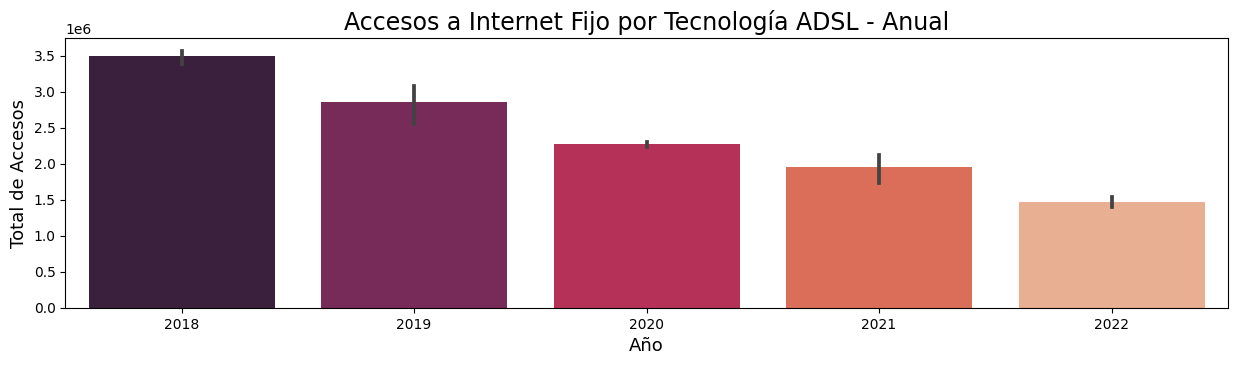

In [30]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='adsl', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología ADSL - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2022 se registró el valor mínimo de accesos por Tecnología ADSL: 1.395.277
- En el año 2018 se registró el valor máximo de accesos por Tecnología ADSL: 3.574.294

2.2 - Accesos a Internet Fijo por Tecnología Cable Modem - Anual

In [31]:
print("Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Cable Modem:")
print(dfNacional.groupby('anio').agg({'cablemodem': ['min', 'max']}))

Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Cable Modem:
     cablemodem         
            min      max
anio                    
2018    3981129  4313831
2019    4435439  4883869
2020    4903674  5371824
2021    5424782  5984240
2022    5979214  6073426


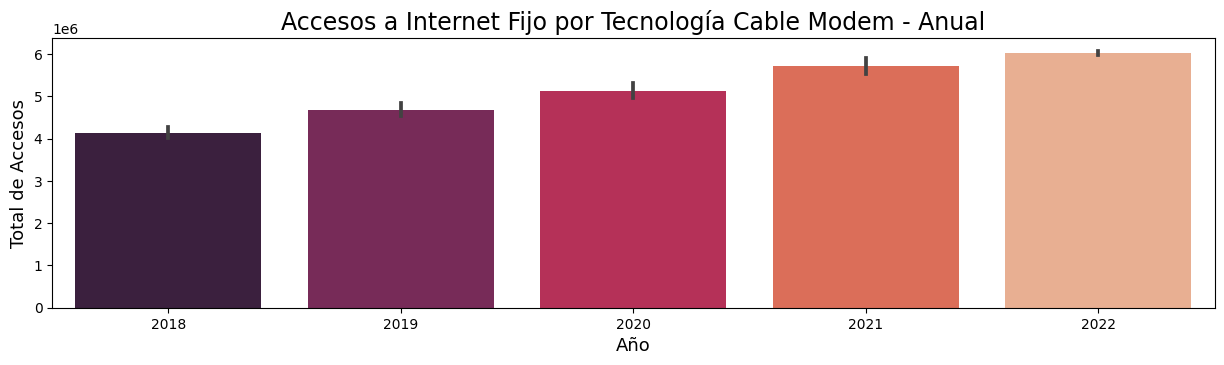

In [32]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='cablemodem', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología Cable Modem - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos por Tecnología Cable Modem: 3.981.129
- En el año 2022 se registró el valor máximo de accesos por Tecnología Cable Modem: 6.073.426

2.3 - Accesos a Internet Fijo por Tecnología Fibra óptica - Anual

In [33]:
print("Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Fibra óptica:")
print(dfNacional.groupby('anio').agg({'fibra_optica': ['min', 'max']}))

Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Fibra óptica:
     fibra_optica         
              min      max
anio                      
2018       217460   388013
2019       637099   941295
2020      1047817  1311199
2021      1362976  2072236
2022      2219533  2871541


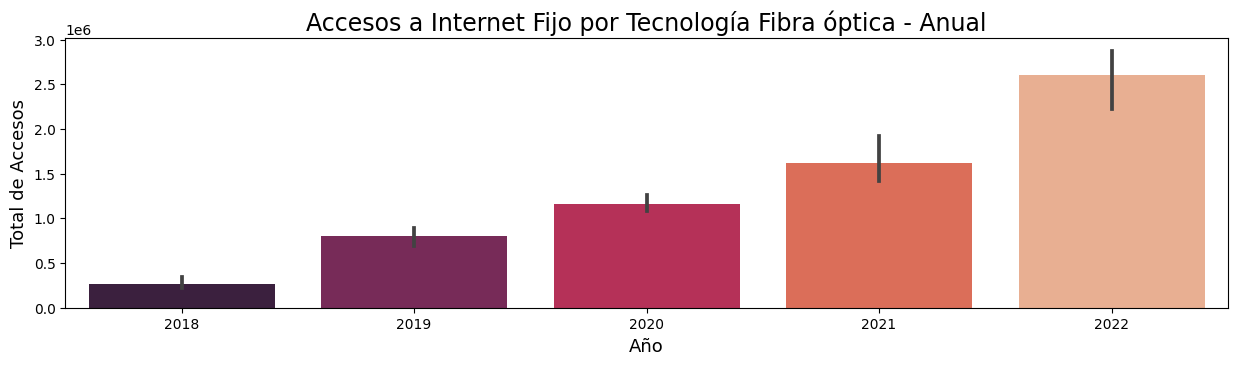

In [34]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='fibra_optica', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología Fibra óptica - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos por Tecnología Fibra óptica: 217.460
- En el año 2022 se registró el valor máximo de accesos por Tecnología Fibra óptica: 2.871.541
- 

2.4 - Accesos a Internet Fijo por Tecnología Wireless - Anual

In [35]:
print("Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Wireless:")
print(dfNacional.groupby('anio').agg({'wireless': ['min', 'max']}))

Valores mínimos y máximos de Accesos a Internet Fijo por Tecnología Wireless:
     wireless        
          min     max
anio                 
2018     1653  264299
2019   276419  340144
2020   352333  421554
2021   434548  523107
2022    55711  556243


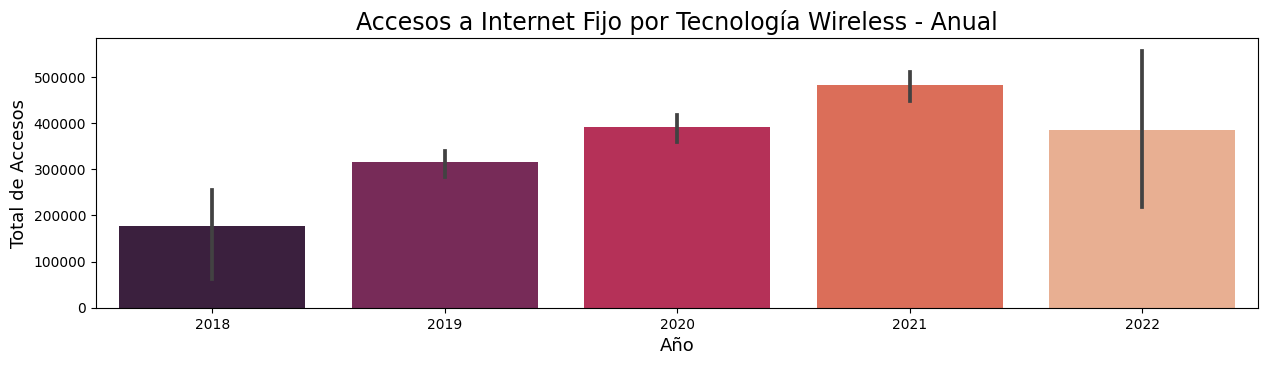

In [36]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='wireless', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología Wireless - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos por Tecnología Wireless: 1.653
- En el año 2022 se registró el valor máximo de accesos por Tecnología Wireless: 556.243

2.5 - Accesos a Internet Fijo por Otras Tecnología - Anual

In [37]:
print("Valores mínimos y máximos de Accesos a Internet Fijo por Otras Tecnologías:")
print(dfNacional.groupby('anio').agg({'otras_tecnologias': ['min', 'max']}))

Valores mínimos y máximos de Accesos a Internet Fijo por Otras Tecnologías:
     otras_tecnologias        
                   min     max
anio                          
2018              9387  178485
2019            166389  265328
2020            209145  253036
2021             25019  253552
2022             23523  251996


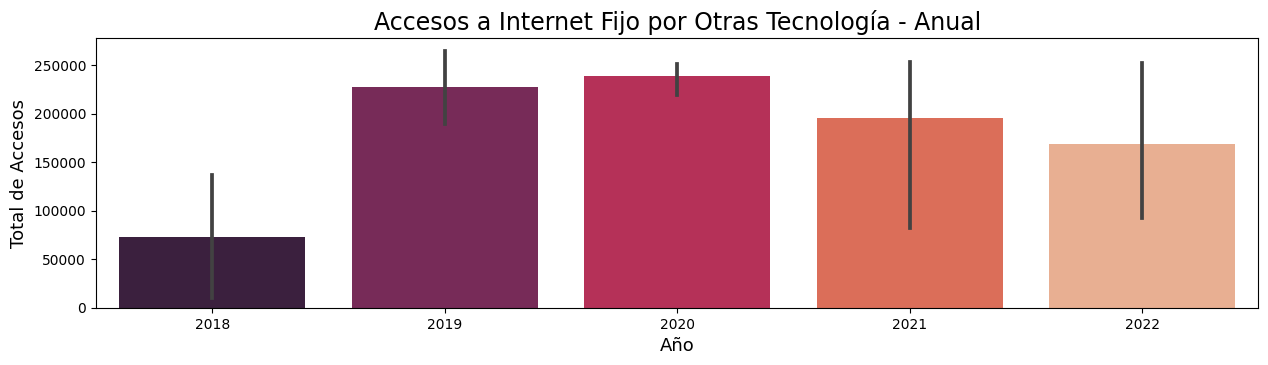

In [38]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='otras_tecnologias', data=dfNacional, palette = 'rocket')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Otras Tecnología - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de accesos por Otras Tecnologías: 9.387
- En el año 2022 se registró el valor máximo de accesos por Otras Tecnologías: 265.328

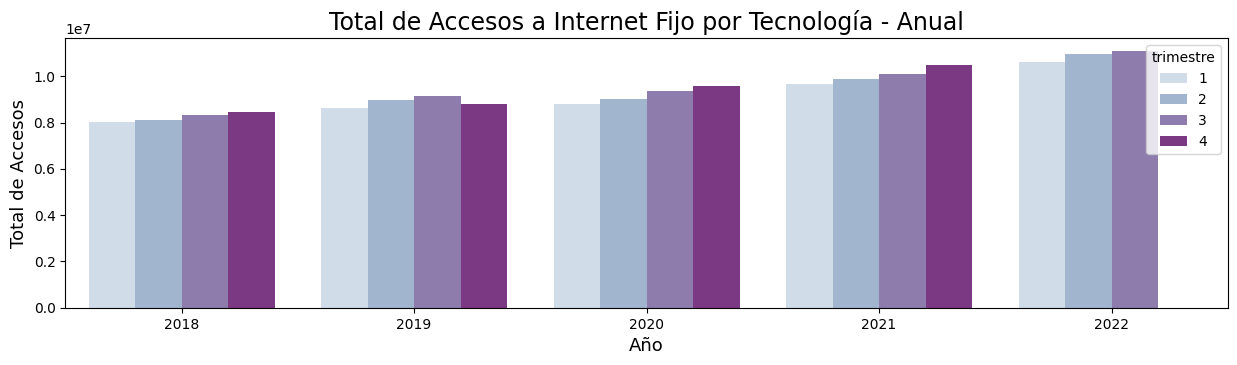

In [39]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='total_tecnologia',data=dfNacional, hue='trimestre',palette = 'BuPu')
plt.ylabel('Total de Accesos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Total de Accesos a Internet Fijo por Tecnología - Anual', fontsize=17)
plt.show()

- Cuál fue la Tecnología con mayor demanda por los clientes en el Año 2022?

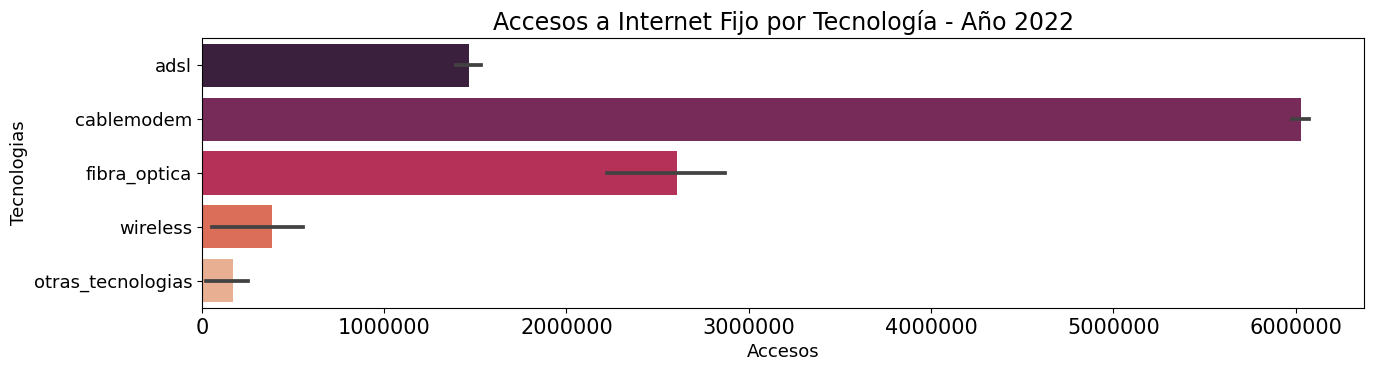

In [65]:
# Cuál fue la tecnologia con mayor demanda por los clientes en el Año 2022?
dataTecNacAnio=dfNacional[dfNacional.anio == 2022]
dataTecNacAnio = pd.melt(dataTecNacAnio, id_vars=['anio','trimestre','total_tecnologia'], value_vars = ['adsl','cablemodem','fibra_optica','wireless', 'otras_tecnologias'], var_name ='Tecnología', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataTecNacAnio, y='Tecnología', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Tecnologias', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología - Año 2022', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la Tecnología con mayor demanda por los clientes en el Año 2021?

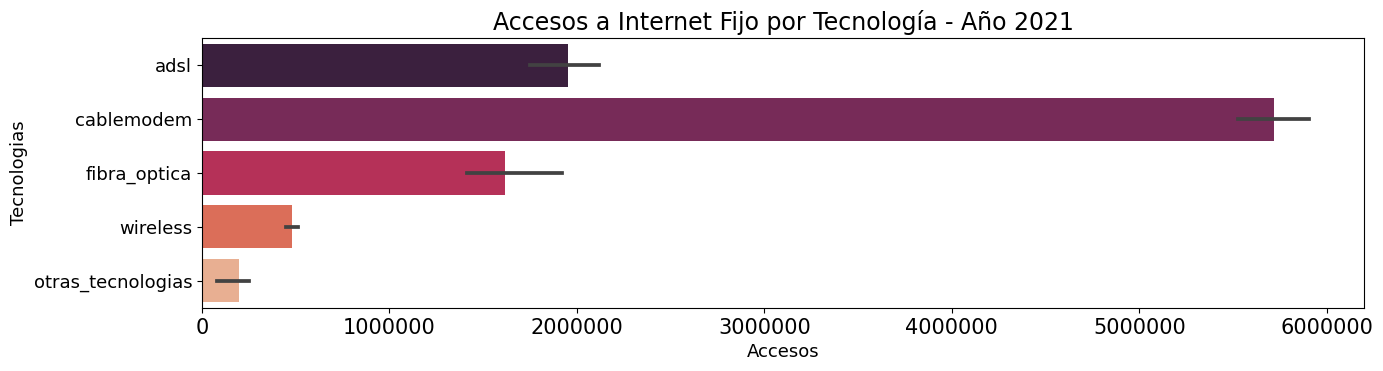

In [67]:
# Cuál fue la tecnologia con mayor demanda por los clientes en el Año 2021?
dataTecNacAnio=dfNacional[dfNacional.anio == 2021]
dataTecNacAnio = pd.melt(dataTecNacAnio, id_vars=['anio','trimestre','total_tecnologia'], value_vars = ['adsl','cablemodem','fibra_optica','wireless', 'otras_tecnologias'], var_name ='Tecnología', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataTecNacAnio, y='Tecnología', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Tecnologias', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología - Año 2021', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la Tecnología con mayor demanda por los clientes en el Año 2020?

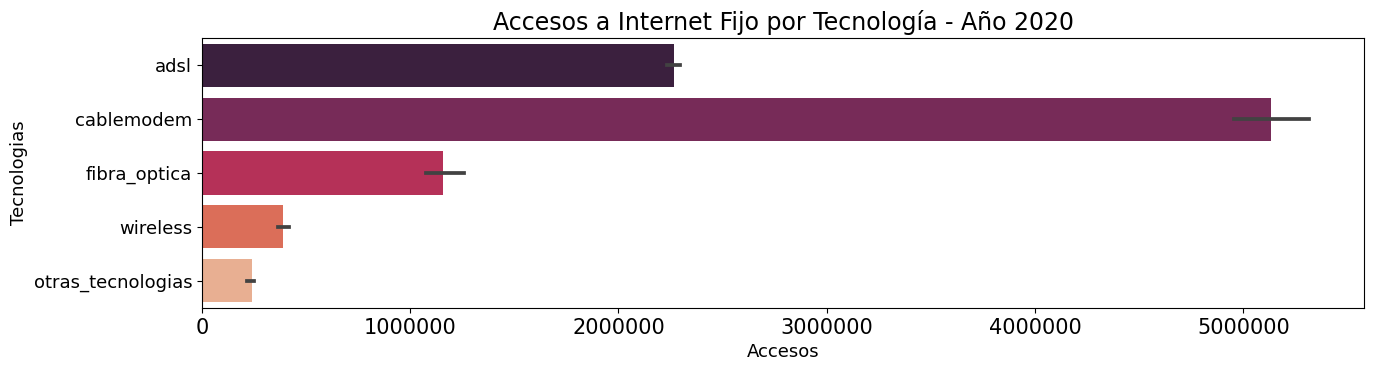

In [80]:
# Cuál fue la tecnologia con mayor demanda por los clientes en el Año 2020?
dataTecNacAnio=dfNacional[dfNacional.anio == 2020]
dataTecNacAnio = pd.melt(dataTecNacAnio, id_vars=['anio','trimestre','total_tecnologia'], value_vars = ['adsl','cablemodem','fibra_optica','wireless', 'otras_tecnologias'], var_name ='Tecnología', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataTecNacAnio, y='Tecnología', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Tecnologias', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología - Año 2020', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la Tecnología con mayor demanda por los clientes en el Año 2019?

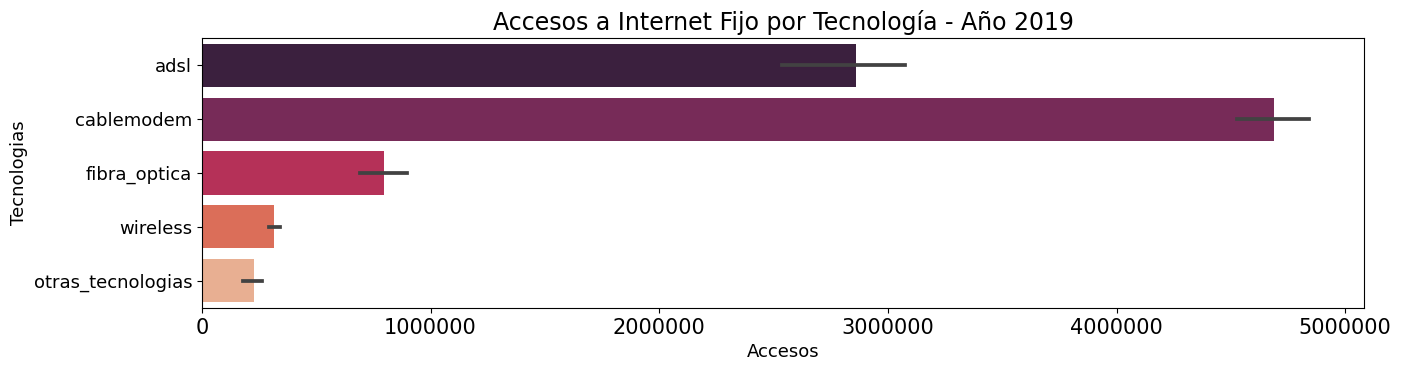

In [81]:
# Cuál fue la tecnologia con mayor demanda por los clientes en el Año 2019?
dataTecNacAnio=dfNacional[dfNacional.anio == 2019]
dataTecNacAnio = pd.melt(dataTecNacAnio, id_vars=['anio','trimestre','total_tecnologia'], value_vars = ['adsl','cablemodem','fibra_optica','wireless', 'otras_tecnologias'], var_name ='Tecnología', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataTecNacAnio, y='Tecnología', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Tecnologias', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología - Año 2019', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

- Cuál fue la Tecnología con mayor demanda por los clientes en el Año 2018?

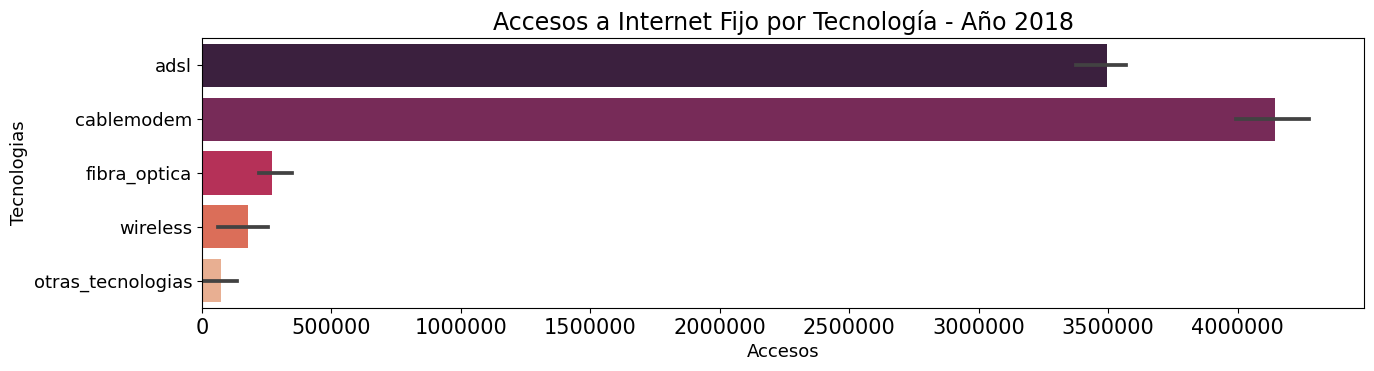

In [82]:
# Cuál fue la tecnologia con mayor demanda por los clientes en el Año 2018?
dataTecNacAnio=dfNacional[dfNacional.anio == 2018]
dataTecNacAnio = pd.melt(dataTecNacAnio, id_vars=['anio','trimestre','total_tecnologia'], value_vars = ['adsl','cablemodem','fibra_optica','wireless', 'otras_tecnologias'], var_name ='Tecnología', value_name ='Nro. de Accesos')

plt.figure(figsize=(15,3.5))
sns.barplot(data=dataTecNacAnio, y='Tecnología', x='Nro. de Accesos', palette='rocket')
plt.ylabel('Tecnologias', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Accesos', fontsize=13)
plt.title(f'Accesos a Internet Fijo por Tecnología - Año 2018', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

**OBSERVACIONES**

- La demanda de la tecnología ADSL ha venido decreciendo desde el año 2018, esto se debe a que en la actualizad existen otras opciones que brindan accesos con mayor velocidad y estabilidad.
- La tecnología de Fibra óptica ha venido en un aumento importante desde el año 2019, este incremento se debe a la situación Pandemia que vivimos, impactando en el teletrabajo, por lo cual necesitamos mejor conectividad para llevar a cabo nuestras tareas profesionales y académicas, impactando positivamente en la demanda del servicio.
- La tecnología Cable Modem ha sido la tecnología con mayor demanda de conexiones a lo largo de los años.

### 3 - Ingresos por Prestación de Servicio de Internet Fijo

3.1 - Ingresos por Prestación de Servicio de Internet Fijo - Anual

In [40]:
print("Valores mínimos y máximos de Ingresos por Prestación de Servicio de Internet Fijos:")
print(dfNacional.groupby('anio').agg({'ingresos': ['min', 'max']}))

Valores mínimos y máximos de Ingresos por Prestación de Servicio de Internet Fijos:
      ingresos          
           min       max
anio                    
2018  13171459  16637687
2019  20207414  24169251
2020  29946216  33539703
2021  36676371  45467887
2022  55589997  67055930


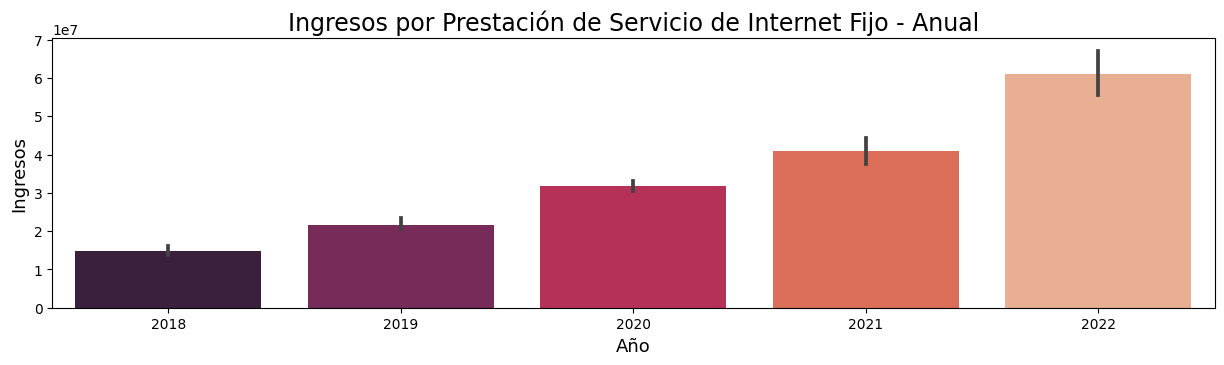

In [41]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='ingresos', data=dfNacional, palette = 'rocket')
plt.ylabel('Ingresos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Ingresos por Prestación de Servicio de Internet Fijo - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de Ingresos: 13.171.459
- En el año 2022 se registró el valor máximo de Ingresos: 67.055.930

3.2 - Ingresos por Prestación de Servicio de Internet Fijo - Trimestral

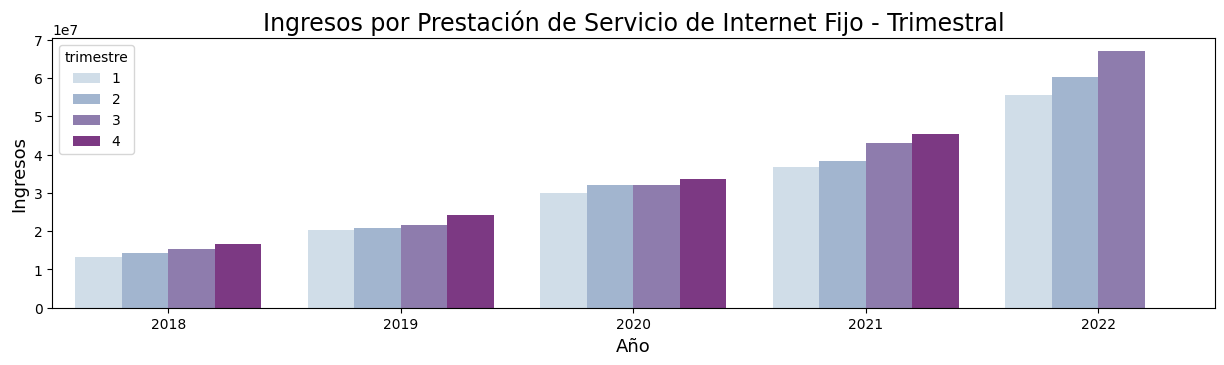

In [42]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='ingresos', data=dfNacional, hue='trimestre', palette = 'BuPu')
plt.ylabel('Ingresos', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Ingresos por Prestación de Servicio de Internet Fijo - Trimestral', fontsize=17)
plt.show()

**OBSERVACIONES**

- Podemos observar que el incremento de los ingresos por Prestación de Servicio de Internet Fijo ha sido constante a lo largo de los años, esto se debe al aumento del trabajo remoto, la educación en línea y el mayor consumo de contenido digital.


### 4 - Velocidad Media de Bajada de Internet Fijo

4.1 - Velocidad Media de Bajada de Internet Fijo - Anual

In [43]:
print("Valores mínimos y máximos de Velocidad Media de Bajada de Internet Fijo:")
print(dfNacional.groupby('anio').agg({'media_bajada_mbps': ['min', 'max']}))

Valores mínimos y máximos de Velocidad Media de Bajada de Internet Fijo:
     media_bajada_mbps       
                   min    max
anio                         
2018             13.22  15.95
2019             17.38  28.26
2020             37.52  42.36
2021             43.11  52.34
2022             55.11  62.46


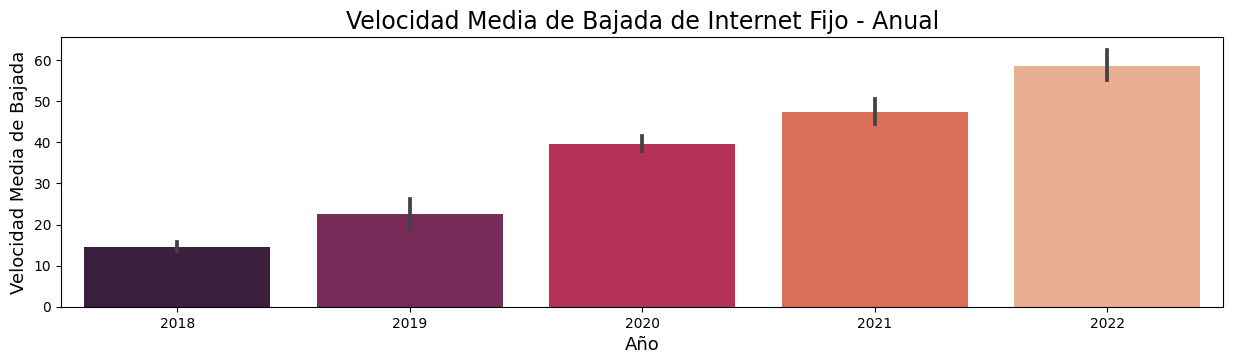

In [44]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='media_bajada_mbps', data=dfNacional, palette='rocket')
plt.ylabel('Velocidad Media de Bajada', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Velocidad Media de Bajada de Internet Fijo - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de Velocidad Media de Bajada: 13.22 mbps
- En el año 2022 se registró el valor máximo de Velocidad Media de Bajada: 62.46 mbps

4.2 - Velocidad Media de Bajada de Internet Fijo - Trimestral

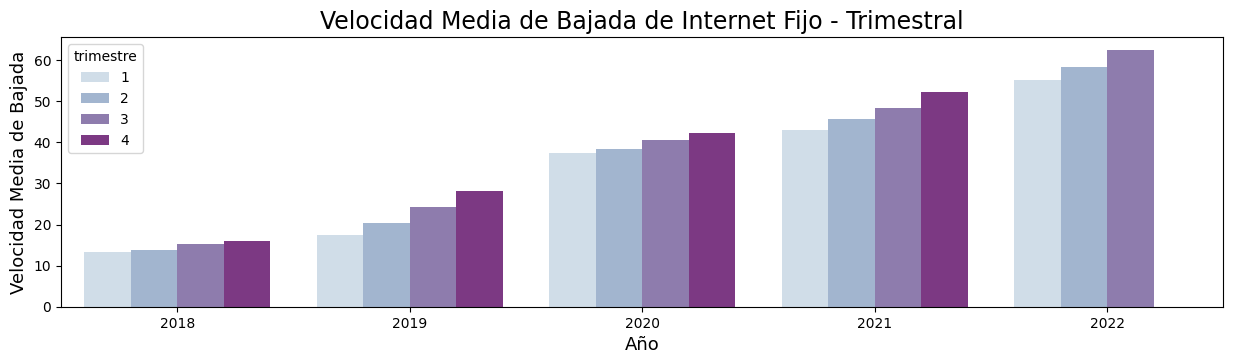

In [45]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='media_bajada_mbps',data=dfNacional, hue='trimestre',palette='BuPu')
plt.ylabel('Velocidad Media de Bajada', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Velocidad Media de Bajada de Internet Fijo - Trimestral', fontsize=17)
plt.show()

4.3 - Promedio por Año - Media de Bajada por Mbps

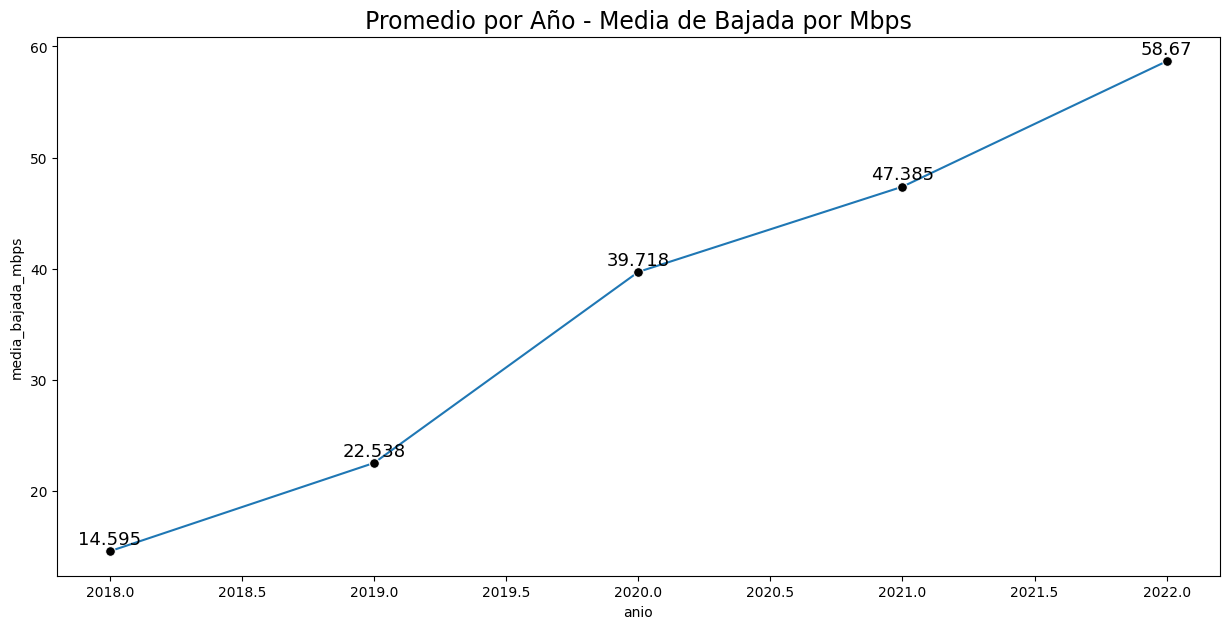

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(data = dfNacional.groupby(by='anio').mean(), y='media_bajada_mbps', x='anio', palette='rocket', marker='o', markerfacecolor='black', markersize=7)

for x, y in zip(dfNacional.groupby(by='anio').mean().reset_index()['anio'], dfNacional.groupby(by='anio').mean().reset_index()['media_bajada_mbps']):
    plt.annotate(f'{round(y,3)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=13)

plt.title('Promedio por Año - Media de Bajada por Mbps', fontsize=17)
plt.show()

**OBSERVACIONES**

- El gráfico de barras y de línea, nos muestra la velocidad media de bajada en Mbps por año y trimestre. Podemos visualizar que al correr de los años la velocidad se ha ido incrementando de manera exponencial. 
- Desde los últimos 5 años desde el 2018 este valor se incrementó notablemente, obteniendo valores máximos.

### 5 - Penetración por hogares nacional de Internet fijo - Anual

5.1 - Penetración cada 100 Hogares

In [54]:
print("Valores mínimos y máximos de Penetración por cada 100 Hogares:")
print(dfNacional.groupby('anio').agg({'accesos_100_hogares': ['min', 'max']}))

Valores mínimos y máximos de Penetración por cada 100 Hogares:
     accesos_100_hogares       
                     min    max
anio                           
2018               58.82  61.42
2019               62.48  65.79
2020               62.86  67.62
2021               67.95  73.18
2022               73.88  76.64


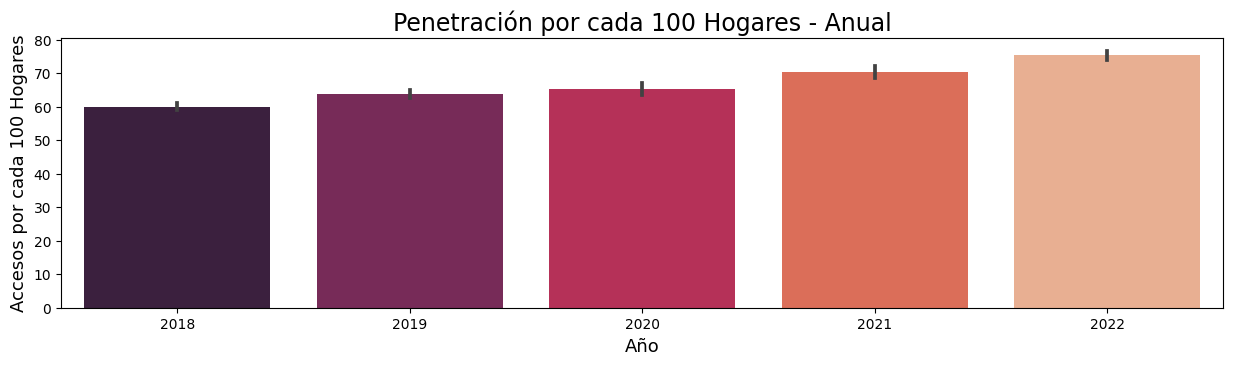

In [55]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='accesos_100_hogares', data=dfNacional, palette='rocket')
plt.ylabel('Accesos por cada 100 Hogares', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Penetración por cada 100 Hogares - Anual', fontsize=17)
plt.show()

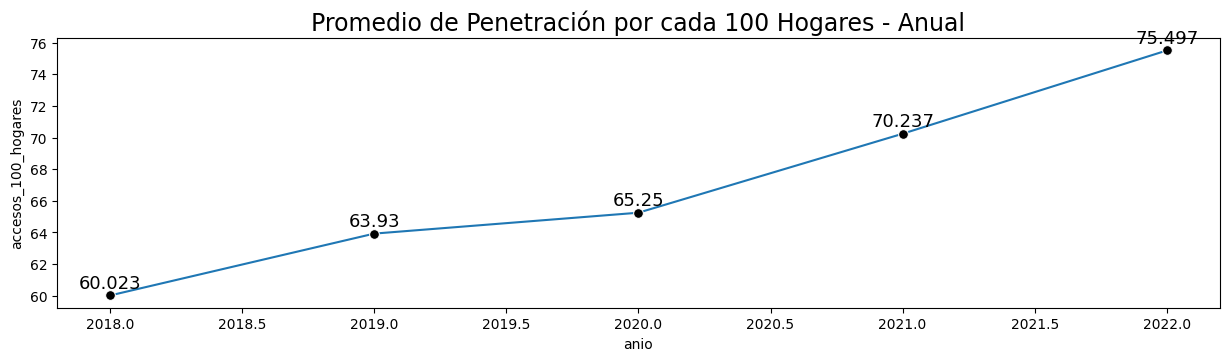

In [56]:
plt.figure(figsize=(15,3.5))
sns.lineplot(data = dfNacional.groupby(by='anio').mean(), y='accesos_100_hogares', x='anio', palette='rocket', marker='o', markerfacecolor='black', markersize=7)

for x, y in zip(dfNacional.groupby(by='anio').mean().reset_index()['anio'], dfNacional.groupby(by='anio').mean().reset_index()['accesos_100_hogares']):
    plt.annotate(f'{round(y,3)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=13)

plt.title('Promedio de Penetración por cada 100 Hogares - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de Penetración por cada 100 Hogares: 58.82
- En el año 2022 se registró el valor máximo de Penetración por cada 100 Hogares: 76.64
- La tasa de penetración por cada 100 hogares es de aproximadamente el 77%. Es importante acotar que este valor puede variar dependiendo de la ubicación geográfica, el nivel socioeconómico y la infraestructura de conexión a Internet en cada área.

5.2 - Penetración cada 100 Habitantes

In [58]:
print("Valores mínimos y máximos de Penetración por cada 100 Habitantes:")
print(dfNacional.groupby('anio').agg({'accesos_100_hab': ['min', 'max']}))

Valores mínimos y máximos de Penetración por cada 100 Habitantes:
     accesos_100_hab       
                 min    max
anio                       
2018           18.12  18.97
2019           19.31  20.36
2020           19.48  21.01
2021           21.13  22.81
2022           23.05  23.95


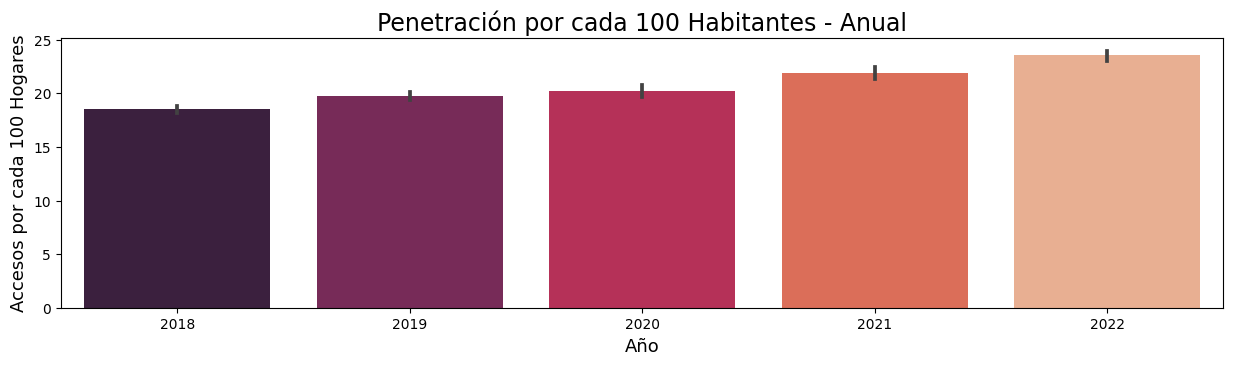

In [59]:
plt.figure(figsize=(15,3.5))
sns.barplot(x='anio', y='accesos_100_hab', data=dfNacional, palette='rocket')
plt.ylabel('Accesos por cada 100 Hogares', fontsize=13)
plt.xlabel('Año', fontsize=13)
plt.title(f'Penetración por cada 100 Habitantes - Anual', fontsize=17)
plt.show()

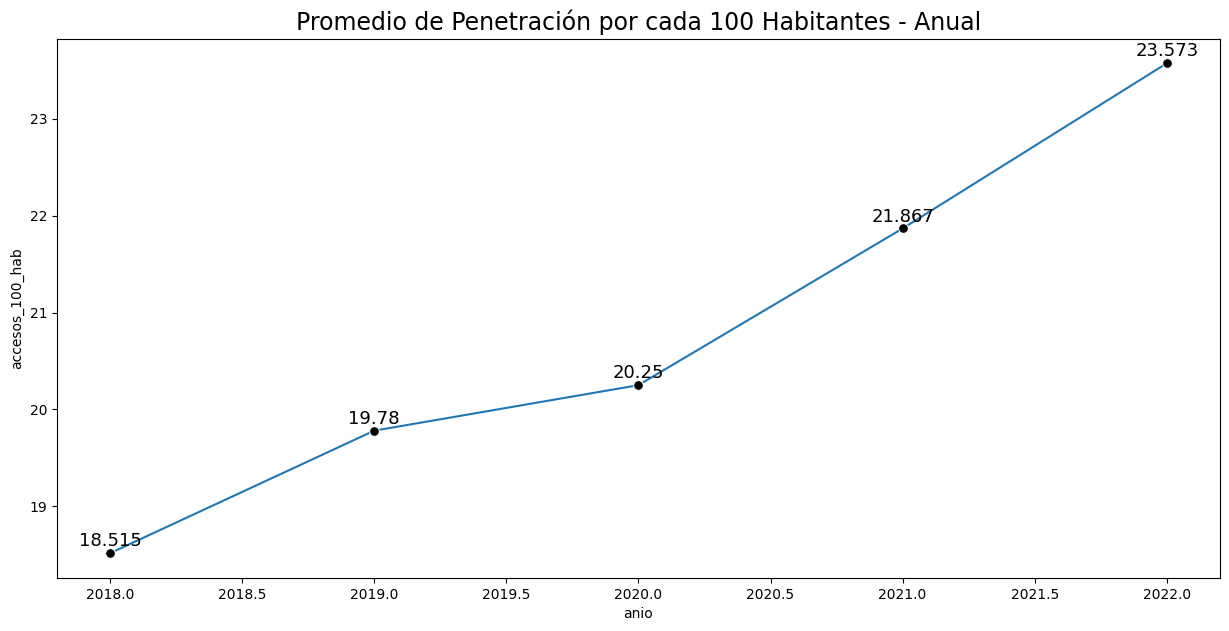

In [63]:
plt.figure(figsize=(15,7))
sns.lineplot(data = dfNacional.groupby(by='anio').mean(), y='accesos_100_hab', x='anio', palette='rocket', marker='o', markerfacecolor='black', markersize=7)

for x, y in zip(dfNacional.groupby(by='anio').mean().reset_index()['anio'], dfNacional.groupby(by='anio').mean().reset_index()['accesos_100_hab']):
    plt.annotate(f'{round(y,3)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=13)

plt.title('Promedio de Penetración por cada 100 Habitantes - Anual', fontsize=17)
plt.show()

**OBSERVACIONES**

- En el año 2018 se registró el valor mínimo de Penetración por cada 100 Habitantes: 18.12
- En el año 2022 se registró el valor máximo de Penetración por cada 100 Habitantes: 23.95
- La tasa de penetración por cada 100 habitantes es de aproximadamente el 24%. Es importante acotar que este valor puede variar dependiendo de la ubicación geográfica, el nivel socioeconómico y la infraestructura de conexión a Internet en cada área.

### 6 - Mapa de Correlaciones

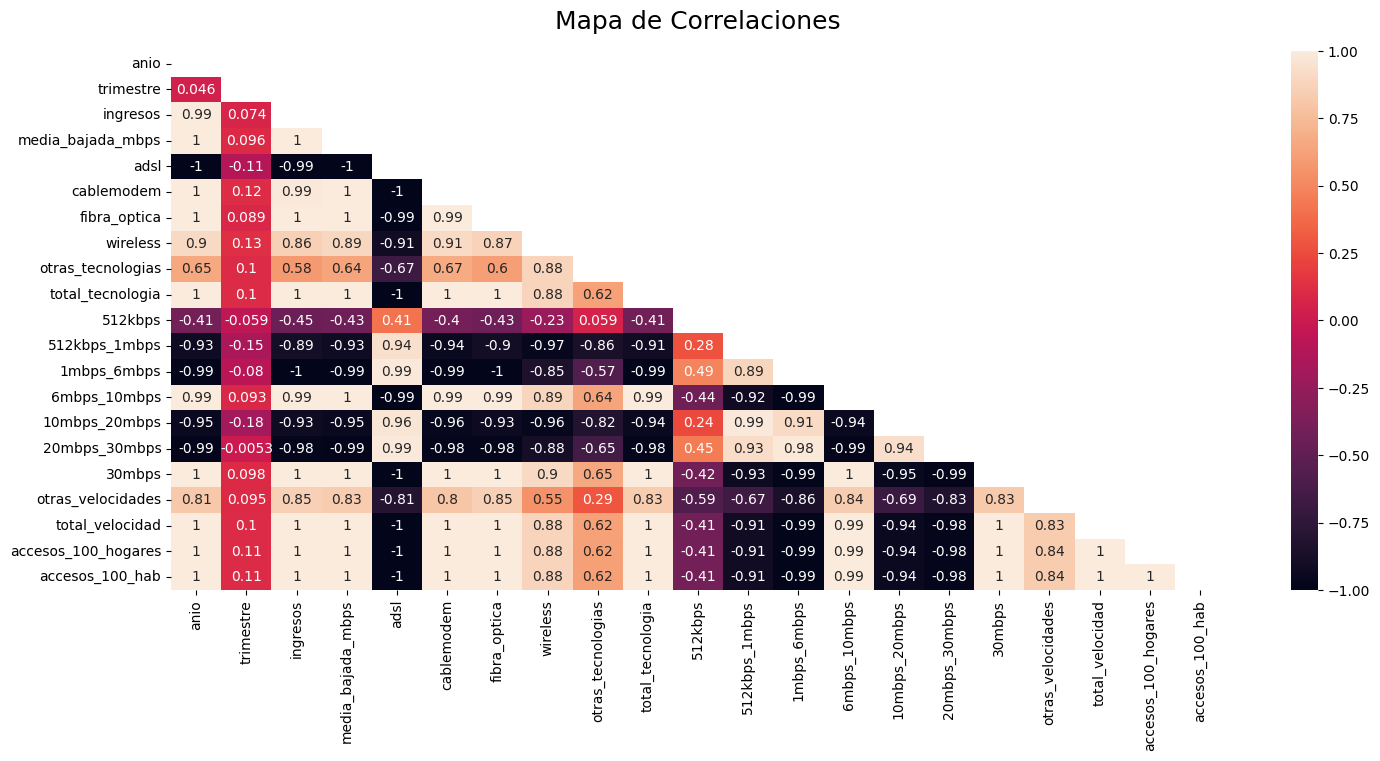

In [64]:
# Mapa de Correlación de Variables Numericas
correlations = dfNacional.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(17, 7))
mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlations.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa de Correlaciones', fontdict={'fontsize':18}, pad=16);

**OBSERVACIONES**

 - Existe una alta correlación entre las variables media de bajada e ingresos. Esto nos indica que a mayor velocidad podemos tener incrementos significativos en nuestros ingresos, ya que por lo general los usuarios con mayor poder adquisitivo tienden a contratar servicios de internet de gran velocidad. Sin embargo, esta relación no es necesariamente absoluta en todos los casos.

 - La variable que hace referencia a la tecnología de Fibra óptica también tiene alta correlación con la variable media de bajada, esto se debe a que la fibra óptica nos ofrece  velocidades mucho más altas en comparación con otras tecnologías. Esto se debe a que la fibra óptica tiene una mayor capacidad de ancho de banda y una menor degradación de la señal a lo largo de distancias largas.

 - Las variables accesos por cada 100 hogares y cada 100 habitantes tienen una correlacion importante, ya que un mayor acceso a la poblacion le brinda oportunidades para generar ingresos y conocimientos, y de esta forma poder obtar por mejores empleos.


In [83]:
pd.pivot_table(dfNacional,index='anio',values='total_velocidad')
pv=pd.pivot_table(dfNacional,index='anio',values='total_velocidad',columns='trimestre')
pv.info()
#Una tabla pivote se puede graficar diractemente usando el método plot()
#pv.plot.bar()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       5 non-null      float64
 1   2       5 non-null      float64
 2   3       5 non-null      float64
 3   4       4 non-null      float64
dtypes: float64(4)
memory usage: 200.0 bytes


In [84]:
#Diferencias entre el Primer y Segundo Trimestre
pv[2] - pv[1] 

anio
2018     73391.0
2019    312046.0
2020    218630.0
2021    215112.0
2022    334675.0
dtype: float64

In [85]:
#Diferencias entre el Tercer y Segundo Trimestre
pv[3] - pv[2] 

anio
2018    236591.0
2019    204503.0
2020    325143.0
2021    222457.0
2022    132444.0
dtype: float64

In [86]:
#Diferencias entre el Tercer y Primer Trimestre
pv[3] - pv[1] 

anio
2018    309982.0
2019    516549.0
2020    543773.0
2021    437569.0
2022    467119.0
dtype: float64

### 7 - Diagramas de Cajas

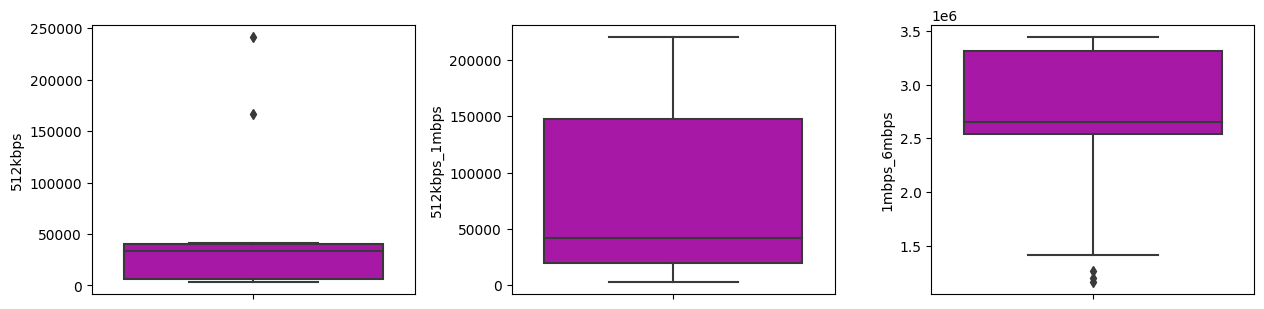

In [42]:
#Graficos de cajas

fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

sns.boxplot(data=dfNacional, y='512kbps',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='512kbps_1mbps',ax=ax2, color='m')
sns.boxplot(data=dfNacional, y='1mbps_6mbps',ax=ax3, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

In [90]:
print("Valor mínimo 512 kbps:", dfNacional['512kbps'].min())
print("Valor máximo 512 kbps:", dfNacional['512kbps'].max())

Valor mínimo 512 kbps: 3489
Valor máximo 512 kbps: 241713


In [93]:
print("Valor mínimo entre 1 mbps hasta 6 mbps:", dfNacional['1mbps_6mbps'].min())
print("Valor máximo 1 mbps hasta 6 mbps:", dfNacional['1mbps_6mbps'].max())

Valor mínimo entre 1 mbps hasta 6 mbps: 1161370
Valor máximo 1 mbps hasta 6 mbps: 3444458


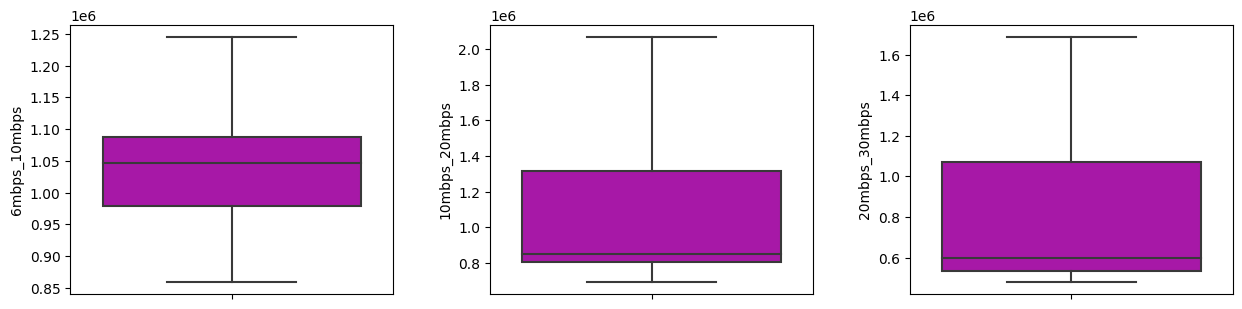

In [41]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

sns.boxplot(data=dfNacional, y='6mbps_10mbps',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='10mbps_20mbps',ax=ax2, color='m')
sns.boxplot(data=dfNacional, y='20mbps_30mbps',ax=ax3, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

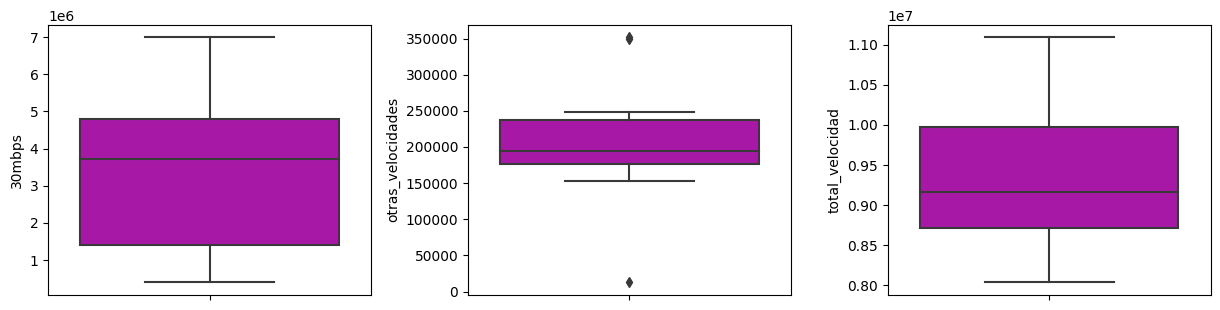

In [39]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
	
sns.boxplot(data=dfNacional, y='30mbps',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='otras_velocidades',ax=ax2, color='m')
sns.boxplot(data=dfNacional, y='total_velocidad',ax=ax3, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

In [91]:
print("Valor mínimo Otras Velocidades:", dfNacional['otras_velocidades'].min())
print("Valor máximo Otras Velocidades:", dfNacional['otras_velocidades'].max())

Valor mínimo Otras Velocidades: 12657
Valor máximo Otras Velocidades: 351594


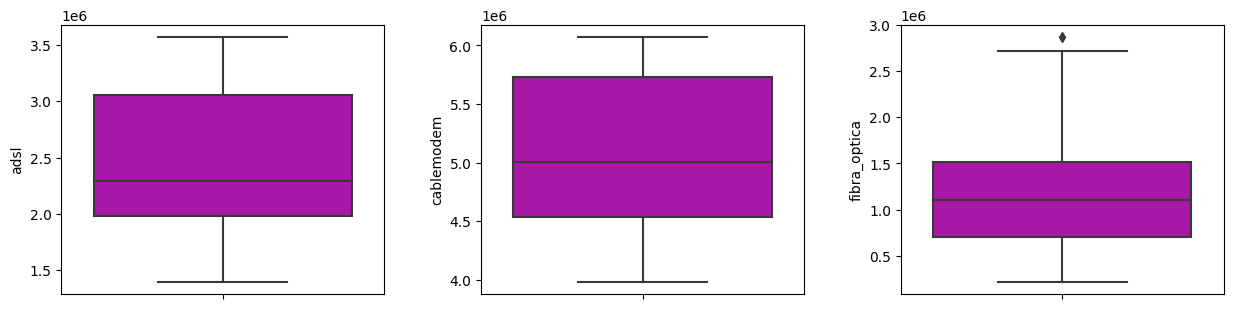

In [85]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
	
sns.boxplot(data=dfNacional, y='adsl',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='cablemodem',ax=ax2, color='m')
sns.boxplot(data=dfNacional, y='fibra_optica',ax=ax3, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

In [92]:
print("Valor mínimo Fibra óptica:", dfNacional['fibra_optica'].min())
print("Valor máximo Fibra óptica:", dfNacional['fibra_optica'].max())

Valor mínimo Fibra óptica: 217460
Valor máximo Fibra óptica: 2871541


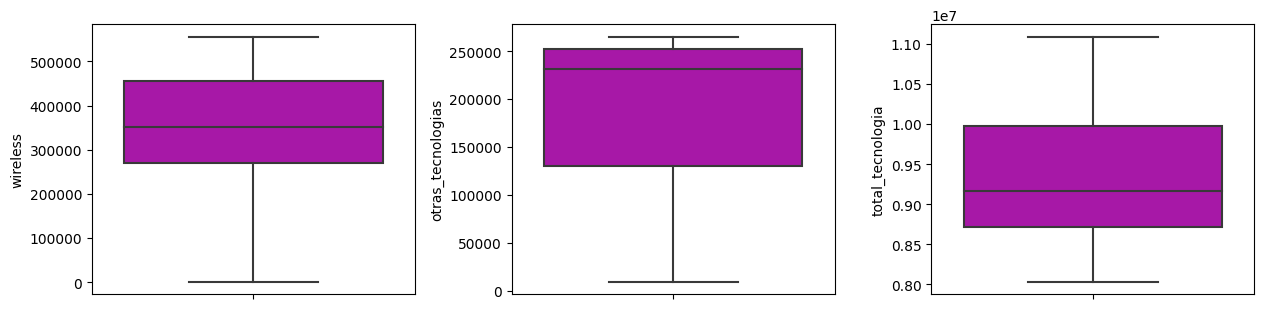

In [86]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
	
sns.boxplot(data=dfNacional, y='wireless',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='otras_tecnologias',ax=ax2, color='m')
sns.boxplot(data=dfNacional, y='total_tecnologia',ax=ax3, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

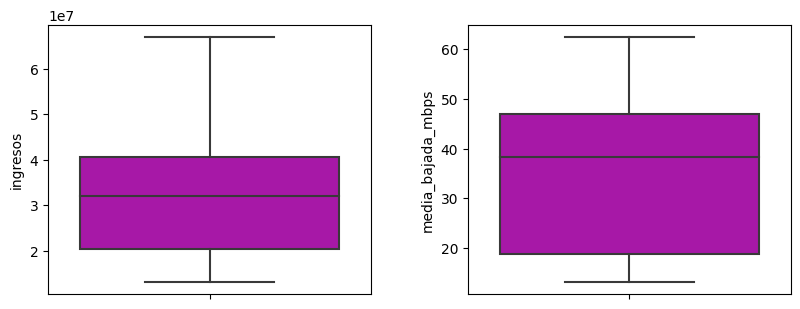

In [87]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
	
sns.boxplot(data=dfNacional, y='ingresos',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='media_bajada_mbps',ax=ax2, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

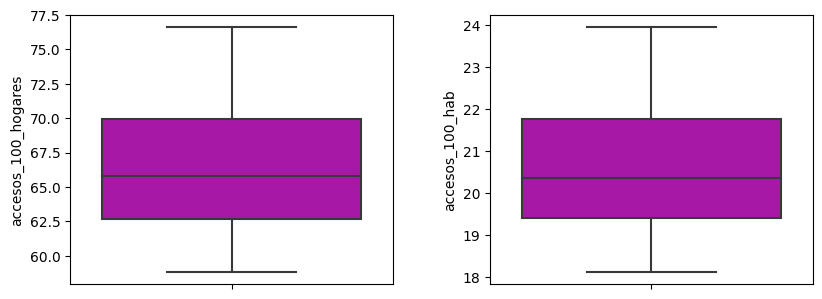

In [57]:
fig=plt.figure(figsize=(15,3.5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
	
sns.boxplot(data=dfNacional, y='accesos_100_hogares',ax=ax1, color='m')
sns.boxplot(data=dfNacional, y='accesos_100_hab',ax=ax2, color='m')
fig.subplots_adjust(hspace=0.7, wspace=0.3)

**OBSERVACIONES**

- La variable que hace referencia a la velocidad hasta 512 kbps, tiene dos valores atípicos: 241.713 y 166.573, estos valores corresponden al tercer y primer trimestre del año 2019, coincidiendo con la Pandemia, donde los usuarios necesitaban estar conectados para poder realizar sus tareas como el trabajo remoto, clases en línea y las videollamadas.

- La variable que hace referencia a la velocidad desde 1 Mbps hasta 6 Mbps, tiene cuatro valores atípicos: 1161370, 1193090, 1263273, 1413208, estos valores corresponden al tercer trimestre del año 2021 y los 3 trimestres del año 2022, lo cual nos indica que la cantidad de accesos ha disminuido exponencialmente debido a cambios por parte de los usuarios a otros rangos de velocidades que se encuentran en el mercado.

- La variable que hace referencia a otras velocidades, tiene dos valores atípicos: 351.594, 12.657, estos valores corresponden al primer trimestre del año 2019 y el 2 trimestre del año 2022, lo cual nos indica que la cantidad de accesos disminuyo durante la Pandemia, posiblemente con el impacto económico sobre los usuarios que tuvieron que migrar a otro rango de velocidad. En cuanto a su incremento en el 2022 ha aumentado notablemente debido a la necesidad del usuario a velocidades superiores.

- La variable que hace referencia a la tecnologia de Fibra Optica, tiene 1 valor atípico: 2.871.541, este valor corresponde al tercer trimestre del año 2022, lo cual nos indica que la cantidad de accesos ha aumentado considerablemente, debido a que ofrece una mayor estabilidad y velocidad de conexión.

### ANALISIS EXPLORATORIO DE DATOS - POR PROVINCIAS

### Lectura del dataset: dataset_provincias.csv

In [109]:
dfProvincias = pd.read_csv('data/dataset_provincias.csv', sep=';', encoding='utf-8')
dfProvincias.head()

anio  trimestre        provincia  media_bajada_mbps    adsl  cablemodem  \
0  2022          3     Buenos Aires                 70  339648     2748325   
1  2022          3  Capital Federal                101  140791     1240125   
2  2022          3        Catamarca                 61   10010       10495   
3  2022          3            Chaco                 53   27164       61800   
4  2022          3           Chubut                 16   45377       72212   

   fibra_optica  wireless  otras_tecnologias  total_tecnologia  512kbps  \
0       1436433    126846              70416           4721668    29985   
1        129218      5758              31787           1547679     5170   
2         46224      1329               2235             70293      710   
3         44645      8178               2359            144146     4610   
4          9574     29784               8831            165778     1090   

   512kbps_1mbps  1mbps_6mbps  6mbps_10mbps  10mbps_20mbps  20mbps_30mbps  \
0          27709       290315        297915         267044          12419   
1           5742        34371         67829          51946          28692   
2           3840         3107          5389           5099           3737   
3           9870        16782         18938           8049          15828   
4           1444        45707          3094          34682          15309   

    30mbps  otras_velocidades  total_velocidad  accesos_100_hogares  
0  3618689             650821          4721668                78.11  
1  1253105            1050477          1547679               122.28  
2    50298              20208            70293                65.33  
3    79390              30711           144146                43.86  
4    17563             200024           165778                84.38

### Determinamos el tamaño de los datos
- ¿Qué tipo de dato son las variables del conjunto de datos dfProvincias?

In [89]:
dfProvincias.dtypes

anio                     int64
trimestre                int64
provincia               object
media_bajada_mbps        int64
adsl                     int64
cablemodem               int64
fibra_optica             int64
wireless                 int64
otras_tecnologias        int64
total_tecnologia         int64
512kbps                  int64
512kbps_1mbps            int64
1mbps_6mbps              int64
6mbps_10mbps             int64
10mbps_20mbps            int64
20mbps_30mbps            int64
30mbps                   int64
otras_velocidades        int64
total_velocidad          int64
accesos_100_hogares    float64
dtype: object

- ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos dfProvincias?

In [90]:
dfProvincias.dtypes.value_counts()

int64      18
object      1
float64     1
Name: count, dtype: int64

- ¿Cuántas variables y observaciones tenemos en el conjunto de datos dfProvincias?

In [91]:
dfProvincias.shape

(840, 20)

- ¿Existen valores nulos explícitos en el conjunto de datos dfProvincias?

In [92]:
dfProvincias.isnull().any()

anio                   False
trimestre              False
provincia              False
media_bajada_mbps      False
adsl                   False
cablemodem             False
fibra_optica           False
wireless               False
otras_tecnologias      False
total_tecnologia       False
512kbps                False
512kbps_1mbps          False
1mbps_6mbps            False
6mbps_10mbps           False
10mbps_20mbps          False
20mbps_30mbps          False
30mbps                 False
otras_velocidades      False
total_velocidad        False
accesos_100_hogares    False
dtype: bool

## Conteos y proporciones
- ¿Qué estadísticos describen el conjunto de datos dfProvincias?

In [93]:
dfProvincias.describe()

anio   trimestre  media_bajada_mbps          adsl    cablemodem  \
count   840.000000  840.000000         840.000000  8.400000e+02  8.400000e+02   
mean   2017.885714    2.457143          13.841667  1.275668e+05  1.717750e+05   
std       2.528745    1.105009          14.669499  2.550543e+05  4.221661e+05   
min    2014.000000    1.000000           3.000000  6.842000e+03  0.000000e+00   
25%    2016.000000    1.000000           4.000000  2.247925e+04  8.599750e+03   
50%    2018.000000    2.000000           7.000000  4.859600e+04  3.498400e+04   
75%    2020.000000    3.000000          18.000000  1.045695e+05  7.074850e+04   
max    2022.000000    4.000000         101.000000  1.586343e+06  2.748325e+06   

       fibra_optica       wireless  otras_tecnologias  total_tecnologia  \
count  8.400000e+02     840.000000         840.000000      8.400000e+02   
mean   2.991186e+04    9937.419048        6603.879762      3.457417e+05   
std    1.235013e+05   17564.217475       10132.970568      7.419436e+05   
min    0.000000e+00       0.000000          13.000000      1.255700e+04   
25%    1.860000e+02    1158.500000         772.500000      5.202975e+04   
50%    1.093000e+03    4262.000000        2734.500000      1.034895e+05   
75%    1.386250e+04   11333.500000        7546.500000      1.779148e+05   
max    1.436433e+06  126887.000000       73415.000000      4.721668e+06   

             512kbps  512kbps_1mbps   1mbps_6mbps   6mbps_10mbps  \
count     840.000000     840.000000  8.400000e+02     840.000000   
mean     2898.440476   10374.467857  1.509700e+05   33783.186905   
std     10900.554628   21587.794231  3.481538e+05   60759.295096   
min        60.000000       0.000000  2.842000e+03       0.000000   
25%       320.000000    1347.000000  2.853925e+04    2967.750000   
50%      1050.000000    3760.500000  4.883450e+04    8303.500000   
75%      2565.750000    8328.250000  8.689750e+04   29956.000000   
max    199768.000000  171244.000000  2.299705e+06  403575.000000   

       10mbps_20mbps  20mbps_30mbps        30mbps  otras_velocidades  \
count     840.000000     840.000000  8.400000e+02       8.400000e+02   
mean    34638.141667   19442.944048  7.917956e+04       4.753555e+04   
std     87389.351535   70347.380887  3.426234e+05       1.198899e+05   
min         0.000000       0.000000  0.000000e+00       0.000000e+00   
25%      2039.500000     190.000000  7.000000e+00       0.000000e+00   
50%      7766.000000    2214.500000  8.825000e+02       0.000000e+00   
75%     24396.500000    9284.000000  1.966075e+04       5.009400e+04   
max    886678.000000  949093.000000  3.618689e+06       1.200464e+06   

       total_velocidad  accesos_100_hogares  
count     8.400000e+02           840.000000  
mean      3.439888e+05            49.065750  
std       7.373366e+05            23.151885  
min       1.240600e+04             9.350000  
25%       5.232825e+04            32.107500  
50%       1.043330e+05            45.900000  
75%       1.775798e+05            61.865000  
max       4.721668e+06           124.060000

**OBSERVACIONES:** 

- El dataframe dfProvincias contiene 840 observaciones, 20 variables de las cuales 18 son tipo int, 1 tipo float y 1 tipo string. Se pudo verificar que no contiene valores nulos.

- El dataframe contiene información relacionada con la media de bajada en mbps, accesos a hogares, y los números de accesos por las diferentes velocidades y tecnologías a lo largo de los años y trimestres. 

- **Para nuestro análisis tomamos los últimos 5 años registrados, es decir, desde el 2018 hasta el 2022**.

- **También es importante acotar que no se cuenta con información del último trimestre del 2022**.

**Descripción de columnas:**

- "anio": Representa el año en el que se registró la medición.
- "trimestre": Indica el trimestre en el que se realizó la medición.
- "media_bajada_mbps": Valor medio de velocidad de bajada en megabits por segundo (Mbps).
- "adsl": Cantidad de accesos por ADSL.
- "cablemodem": Cantidad de accesos por Cable Modem.
- "fibra_optica": Cantidad de accesos por Fibra Óptica.
- "wireless": Cantidad de accesos por Wireless.
- "otras_tecnologias": Cantidad de accesos por Otras Tecnologías ().
- "total_tecnologia": Cantidad de accesos Total por tecnología.
- "512kbps": Cantidad de accesos por 512 Kbps.
- "512kbps_1mbps": Cantidad de accesos desde 512 Kbps hasta 1 Mbps.
- "1mbps_6mbps": Cantidad de accesos desde 1 Mbps hasta 6 Mbps.
- "6mbps_10mbps": Cantidad de accesos desde 6 Mbps hasta 10 Mbps.
- "10mbps_20mbps": Cantidad de accesos desde 10 Mbps hasta 20 Mbps.
- "20mbps_30mbps": Cantidad de accesos desde 20 Mbps hasta 30 Mbps.
- "30mbps": Cantidad de accesos más de 30 Mbps.
- "otras_velocidades": Cantidad de accesos por otras velocidades.
- "total_velocidad": Cantidad de accesos Total por Velocidad.
- "accesos_100_hogares": Valor de accesos por cada 100 hogares.

In [110]:
# Seleccionamos las observaciones desde el año 2018 hasta 2022
dfProvincias =  dfProvincias[dfProvincias.anio >= 2018]

### 1 - Penetración de Internet fijo (accesos por cada 100 hogares) - Provincias

1.1 - Número de accesos al servicio de Internet fijo por cada 100 hogares por Provincia

In [111]:
with open('data/provincias_argentina.geojson') as f: data = json.load(f)

In [117]:
df = dfProvincias[(dfProvincias.anio == 2022)].sort_values(by='trimestre', ascending=True)

In [113]:
dfPobProvArg = pd.read_csv('data/poblacion_provincias_argentina.csv', sep=';', encoding='utf-8')

In [120]:
dfMapa = pd.merge(df, dfPobProvArg, on='provincia', how='left')

In [217]:
fig = px.choropleth_mapbox(dfMapa, 
    geojson=data, 
    featureidkey='properties.nombre', 
    locations='provincia', 
    color='accesos_100_hogares',
    mapbox_style="carto-positron",
    center = {"lat": -38.40, "lon": -63.60},
    zoom=3,
    opacity=1,
    hover_data=['poblacion','accesos_100_hogares'],
    labels={'accesos_100_hogares':'Accesos cada 100 Hogares'},
)

fig.add_scattergeo(
    geojson=data, 
    featureidkey='properties.nombre',
    locations = dfMapa['provincia'],
    text = dfMapa['provincia'],
    mode = 'text') 

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

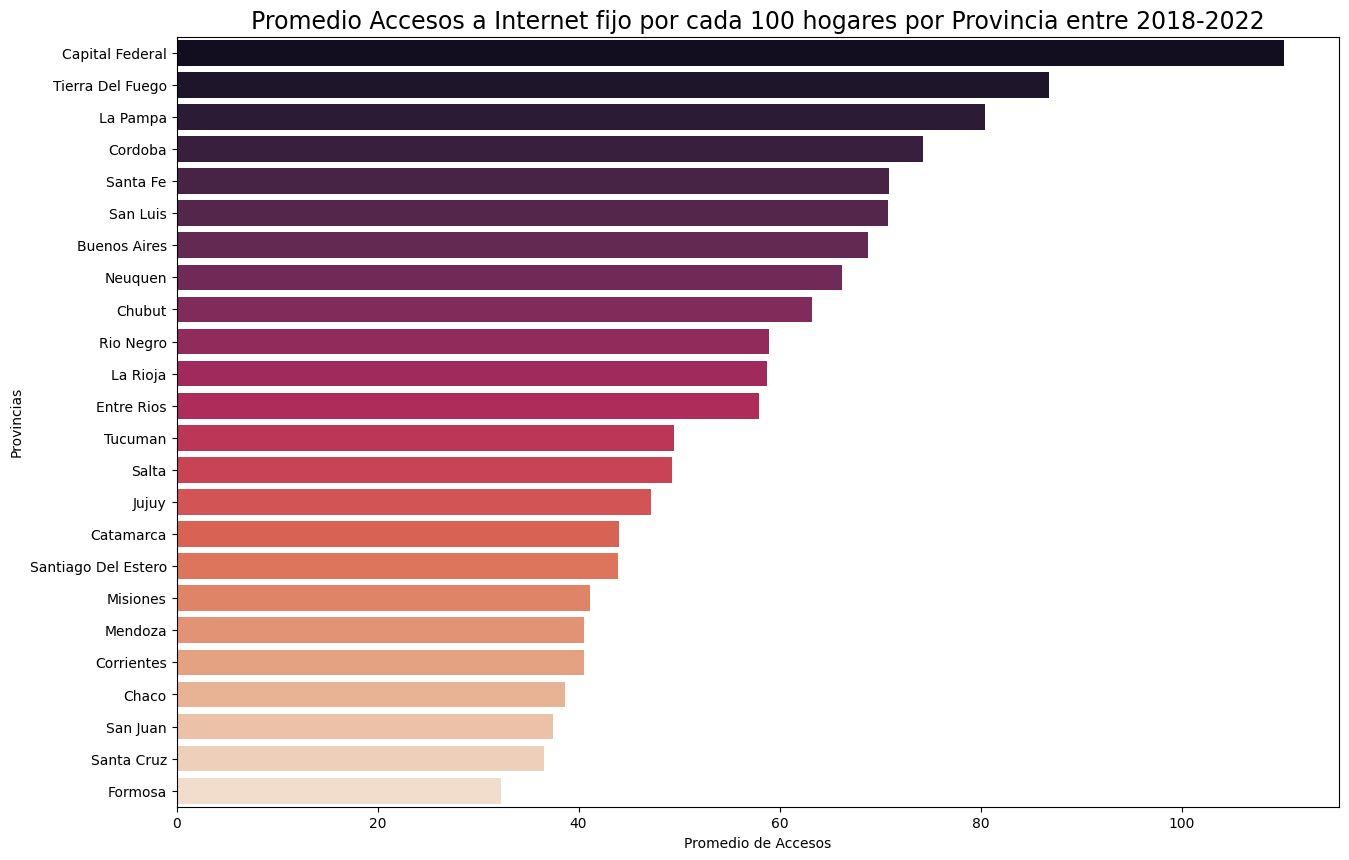

In [202]:
plt.figure(figsize=(15,10))
sns.barplot(data=dfTopProvincias.sort_values(by='accesos_100_hogares', ascending=False), x='accesos_100_hogares', y='provincia', palette='rocket')
plt.title('Promedio Accesos a Internet fijo por cada 100 hogares por Provincia entre 2018-2022', fontsize=17)
plt.xlabel('Promedio de Accesos')
plt.ylabel('Provincias')
plt.show()

- Cuál es el valor mínimo, máximo y el promedio Accesos a Internet fijo por cada 100 hogares por Provincia?

In [203]:
print("Valor mínimo, máximo y el promedio Accesos a Internet fijo por cada 100 hogares por Provincia:")
print(dfProvincias.groupby('provincia').agg({'accesos_100_hogares': ['mean', 'min', 'max']}))

Valor mínimo, máximo y el promedio Accesos a Internet fijo por cada 100 hogares por Provincia:
                    accesos_100_hogares                
                                   mean     min     max
provincia                                              
Buenos Aires                  68.766316   62.63   78.11
Capital Federal              110.158421  105.98  122.28
Catamarca                     44.063158   30.88   65.33
Chaco                         38.604737   30.83   44.06
Chubut                        63.253158   42.61   88.05
Cordoba                       74.291053   63.27   88.31
Corrientes                    40.518947   32.66   48.35
Entre Rios                    57.982105   48.68   63.90
Formosa                       32.268947   21.40   43.76
Jujuy                         47.248947   23.12   58.91
La Pampa                      80.403684   71.04   96.59
La Rioja                      58.706316   46.35   80.66
Mendoza                       40.542105   33.14   51.03
Misiones 

**OBSERVACIONES**

- Podemos visualizar que Capital Federal refleja la mayor proporción de accesos por cada 100 Hogares. Siendo el caso contrario para la Provincia de Santa Cruz, Formosa y Chaco, cabe destacar que estas provincias se encuentran muy alejadas.

### 2 - Velocidad Media de Bajada de Internet Fijo - Por Provincia

In [216]:
fig = px.choropleth_mapbox(dfMapa, 
    geojson=data, 
    featureidkey='properties.nombre', 
    locations='provincia', 
    color='media_bajada_mbps',
    mapbox_style="carto-positron",
    center = {"lat": -38.40, "lon": -63.60},
    zoom=3,
    opacity=1,
    hover_data=['poblacion','media_bajada_mbps'],
    labels={'media_bajada_mbps':'Media de Bajada Mbps'},
)

fig.add_scattergeo(
    geojson=data, 
    featureidkey='properties.nombre',
    locations = dfMapa['provincia'],
    text = dfMapa['provincia'],
    mode = 'text') 

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

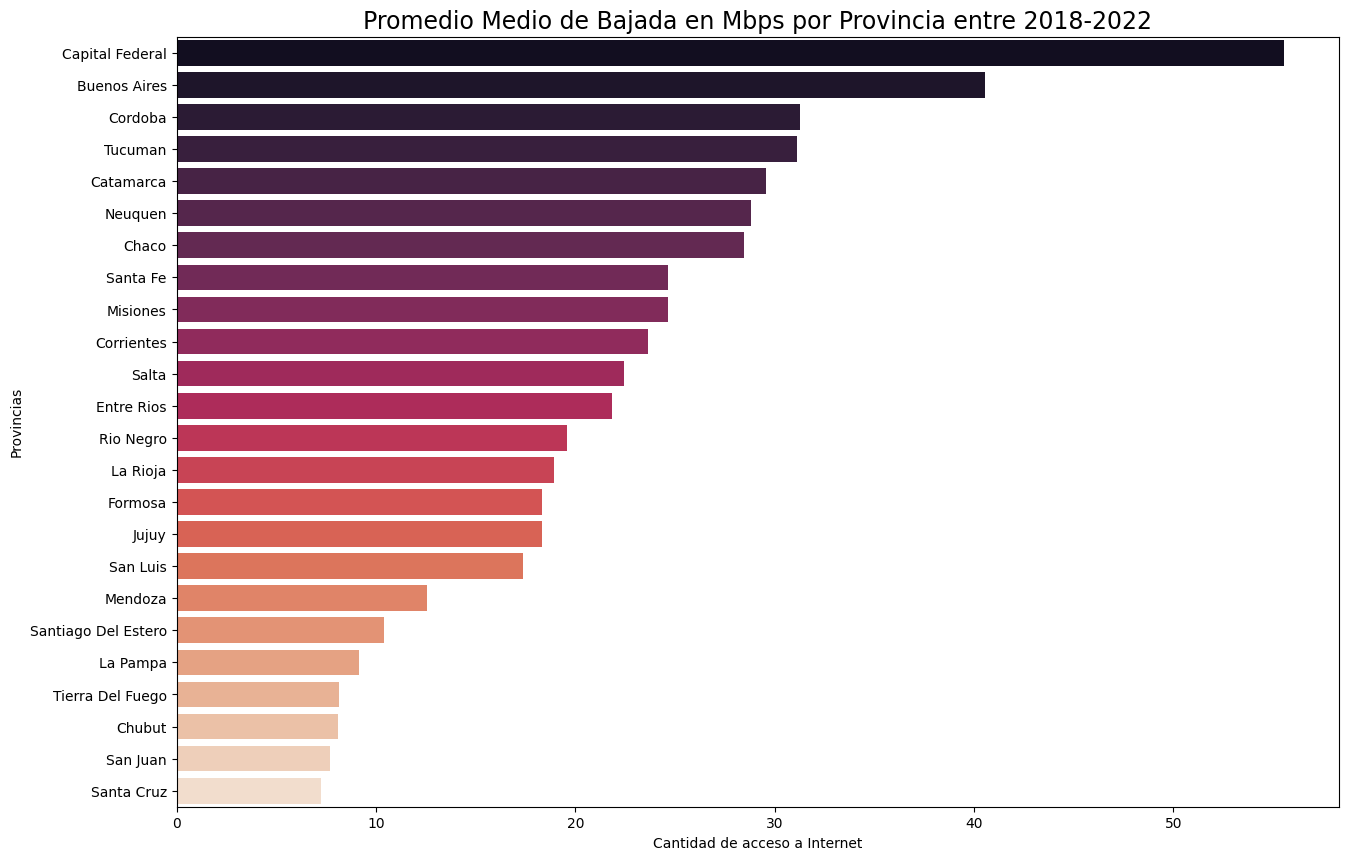

In [199]:
plt.figure(figsize=(15,10))
sns.barplot(data=dfTopProvincias.sort_values(by='media_bajada_mbps', ascending=False), x='media_bajada_mbps', y='provincia', palette='rocket')
plt.title('Promedio Medio de Bajada en Mbps por Provincia entre 2018-2022', fontsize=17)
plt.xlabel('Cantidad de acceso a Internet')
plt.ylabel('Provincias')
plt.show()

- Cuál es el valor mínimo, máximo y el promedio de la media de bajada en Mbps por Provincia?

In [200]:
print("Valor mínimo, máximo y el promedio de la Media de Bajada en Mbps por Provincia:")
print(dfProvincias.groupby('provincia').agg({'media_bajada_mbps': ['mean', 'min', 'max']}))

Valor mínimo, máximo y el promedio de la Media de Bajada en Mbps por Provincia:
                    media_bajada_mbps         
                                 mean min  max
provincia                                     
Buenos Aires                40.526316  14   70
Capital Federal             55.526316  18  101
Catamarca                   29.578947   8   61
Chaco                       28.473684  12   53
Chubut                       8.105263   5   16
Cordoba                     31.263158  13   56
Corrientes                  23.631579  11   45
Entre Rios                  21.842105  10   42
Formosa                     18.315789   9   30
Jujuy                       18.315789   6   32
La Pampa                     9.157895   4   18
La Rioja                    18.947368   6   44
Mendoza                     12.578947   6   34
Misiones                    24.631579  12   49
Neuquen                     28.789474  12   48
Rio Negro                   19.578947   9   34
Salta                      

**OBSERVACIONES**

- Podemos visualizar que Capital Federal refleja la mayor proporción de la Media de Bajada en Mbps. Siendo el caso contrario para la Provincia de Santa Cruz, Tierra del Fuego y Chubut, cabe destacar que estas provincias se encuentran muy alejadas.


## 3 - Accesos a Internet Fijo por Velocidad - Por Provincia

3.1 – Promedio de Accesos a Internet Fijo por Velocidad - Por Provincia

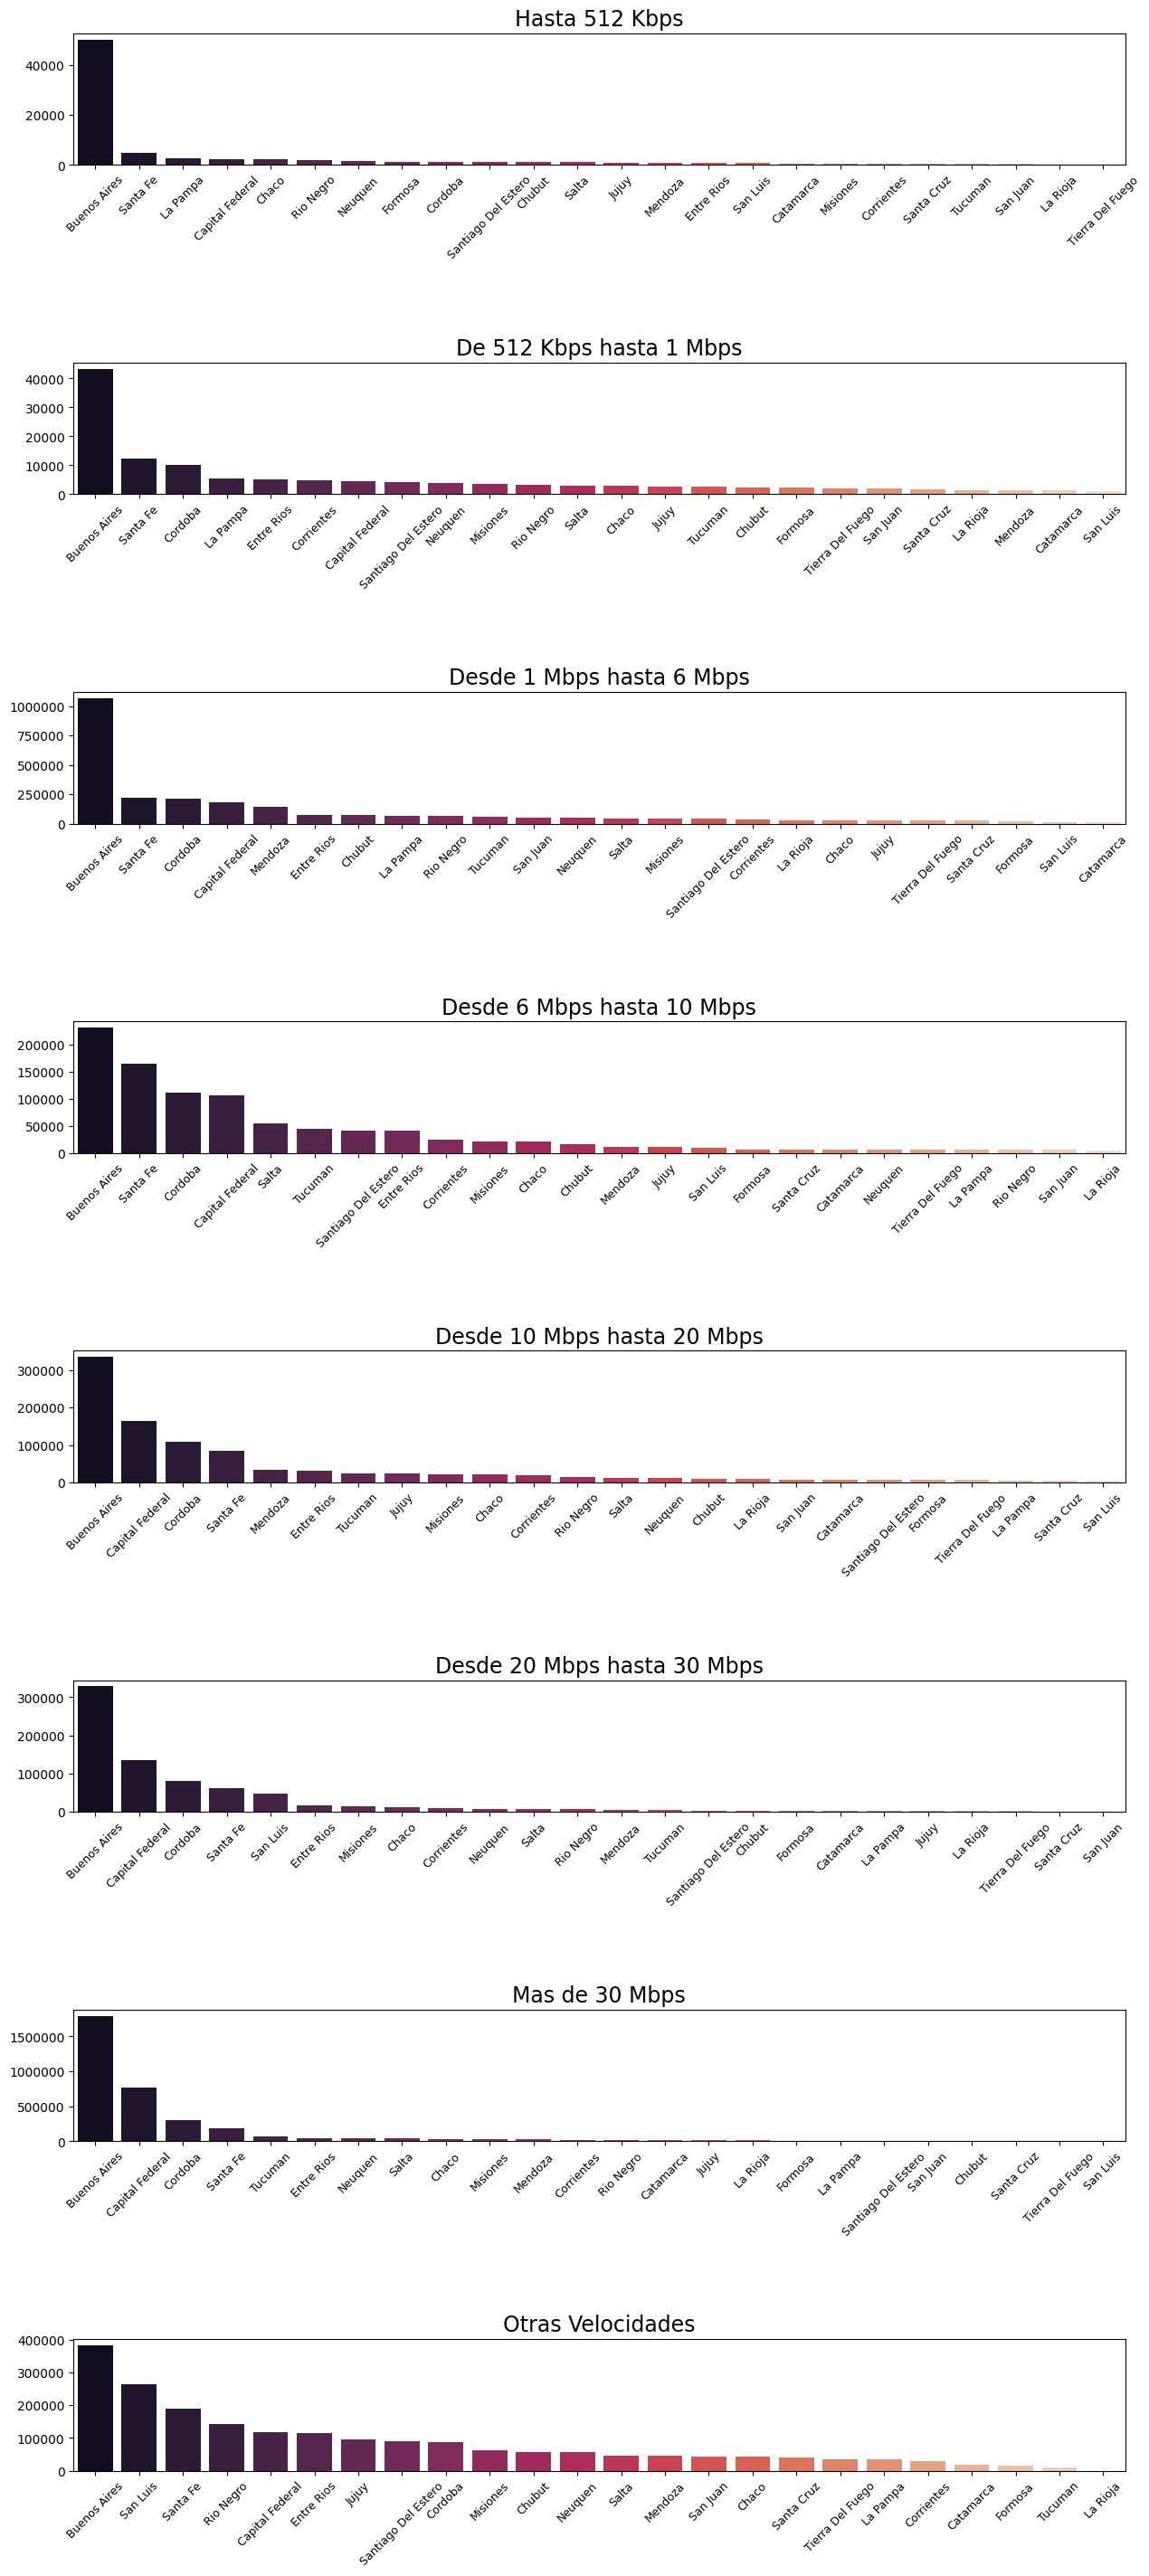

In [270]:
dfTopProvincias = dfProvincias.groupby(by=['provincia']).mean().reset_index()
fig, axes = plt.subplots(nrows=8, figsize=(15,35))

#512kbps
sns.barplot(data=dfTopProvincias.sort_values(by='512kbps', ascending=False),
            x='provincia', y='512kbps', ax=axes[0], palette="rocket")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=9)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_title('Hasta 512 Kbps', fontsize=17)
axes[0].set_ylabel('')
axes[0].set_xlabel('')

#512kbps_1mbps
sns.barplot(data=dfTopProvincias.sort_values(by='512kbps_1mbps', ascending=False),
            x='provincia', y='512kbps_1mbps', ax=axes[1], palette="rocket")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=9)
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_title('De 512 Kbps hasta 1 Mbps', fontsize=17)
axes[1].set_ylabel('')
axes[1].set_xlabel('')

#1mbps_6mbps
sns.barplot(data=dfTopProvincias.sort_values(by='1mbps_6mbps', ascending=False),
            x='provincia', y='1mbps_6mbps',ax=axes[2], palette="rocket")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, fontsize=9)
axes[2].ticklabel_format(style='plain', axis='y')
axes[2].set_title('Desde 1 Mbps hasta 6 Mbps', fontsize=17)
axes[2].set_ylabel('')
axes[2].set_xlabel('')

#6mbps_10mbps
sns.barplot(data=dfTopProvincias.sort_values(by='6mbps_10mbps', ascending=False),
            x='provincia', y='6mbps_10mbps',ax=axes[3], palette="rocket")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, fontsize=9)
axes[3].ticklabel_format(style='plain', axis='y')
axes[3].set_title('Desde 6 Mbps hasta 10 Mbps', fontsize=17)
axes[3].set_ylabel('')
axes[3].set_xlabel('')

#10mbps_20mbps
sns.barplot(data=dfTopProvincias.sort_values(by='10mbps_20mbps', ascending=False),
            x='provincia', y='10mbps_20mbps',ax=axes[4], palette="rocket")
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=45, fontsize=9)
axes[4].ticklabel_format(style='plain', axis='y')
axes[4].set_title('Desde 10 Mbps hasta 20 Mbps', fontsize=17)
axes[4].set_ylabel('')
axes[4].set_xlabel('')

#20mbps_30mbps
sns.barplot(data=dfTopProvincias.sort_values(by='20mbps_30mbps', ascending=False),
            x='provincia', y='20mbps_30mbps',ax=axes[5], palette="rocket")
axes[5].set_xticklabels(axes[5].get_xticklabels(), rotation=45, fontsize=9)
axes[5].ticklabel_format(style='plain', axis='y')
axes[5].set_title('Desde 20 Mbps hasta 30 Mbps', fontsize=17)
axes[5].set_ylabel('')
axes[5].set_xlabel('')

#30mbps
sns.barplot(data=dfTopProvincias.sort_values(by='30mbps', ascending=False),
            x='provincia', y='30mbps',ax=axes[6], palette="rocket")
axes[6].set_xticklabels(axes[6].get_xticklabels(), rotation=45, fontsize=9)
axes[6].ticklabel_format(style='plain', axis='y')
axes[6].set_title('Mas de 30 Mbps', fontsize=17)
axes[6].set_ylabel('')
axes[6].set_xlabel('')

#Otras Velocidad
sns.barplot(data=dfTopProvincias.sort_values(by='otras_velocidades', ascending=False),
            x='provincia', y='otras_velocidades',ax=axes[7], palette="rocket")
axes[7].set_xticklabels(axes[7].get_xticklabels(), rotation=45, fontsize=9)
axes[7].ticklabel_format(style='plain', axis='y')
axes[7].set_title('Otras Velocidades', fontsize=17)
axes[7].set_ylabel('')
axes[7].set_xlabel('')

fig.subplots_adjust(hspace=1.5, wspace=0.3)

**OBSERVACIONES**

- Las 5 Provincias con mayores accesos a velocidad de 512 Kbps son: Buenos Aires, Santa Fe, La Pampa, Capital Federal y Chaco.
- Las 5 Provincias con mayores accesos a velocidades entre 512 Kbps hasta 1 Mbps son: Buenos Aires, Santa Fe, Córdoba, La Pampa y Entre Ríos.
- Las 5 Provincias con mayores accesos a velocidades entre 1 Mbps hasta 6 Mbps son: Buenos Aires, Santa Fe, Córdoba, Capital Federal y Mendoza.
- Las 5 Provincias con mayores accesos a velocidades entre 6 Mbps hasta 10 Mbps son: Buenos Aires, Santa Fe, Córdoba, Capital Federal y Salta. 
- Las 5 Provincias con mayores accesos a velocidades entre 10 Mbps hasta 20 Mbps son: Buenos Aires, Capital Federal, Córdoba, Santa Fe y Mendoza.
- Las 5 Provincias con mayores accesos a velocidades entre 20 Mbps hasta 30 Mbps son: Buenos Aires, Capital Federal, Córdoba, Santa Fe y San Luis.
- Las 5 Provincias con mayores accesos a velocidades mayores a 30 Mbps son: Buenos Aires, Capital Federal, Córdoba, Santa Fe y Tucuman.
- Las 5 Provincias con mayores accesos a otras velocidades son: Buenos Aires, San Luis, Santa Fe, Río Negro y Capital Federal.

- Podemos concluir que en aquellas Provincias donde la actividad económica y el turismo es alto, existen mayor demanda de accesos a internet de velocidades altas.

- La Provincia de Tierra del Fuego es la que menos tiene accesos a velocidades entre 512 Kbps y mas de 30 Mbps, pero se puede observar que posee accesos a otras velocidades.



## 4 - Accesos a Internet Fijo por Tecnología - Por Provincia

4.1 – Promedio de Accesos a Internet Fijo por Tecnología - Por Provincia

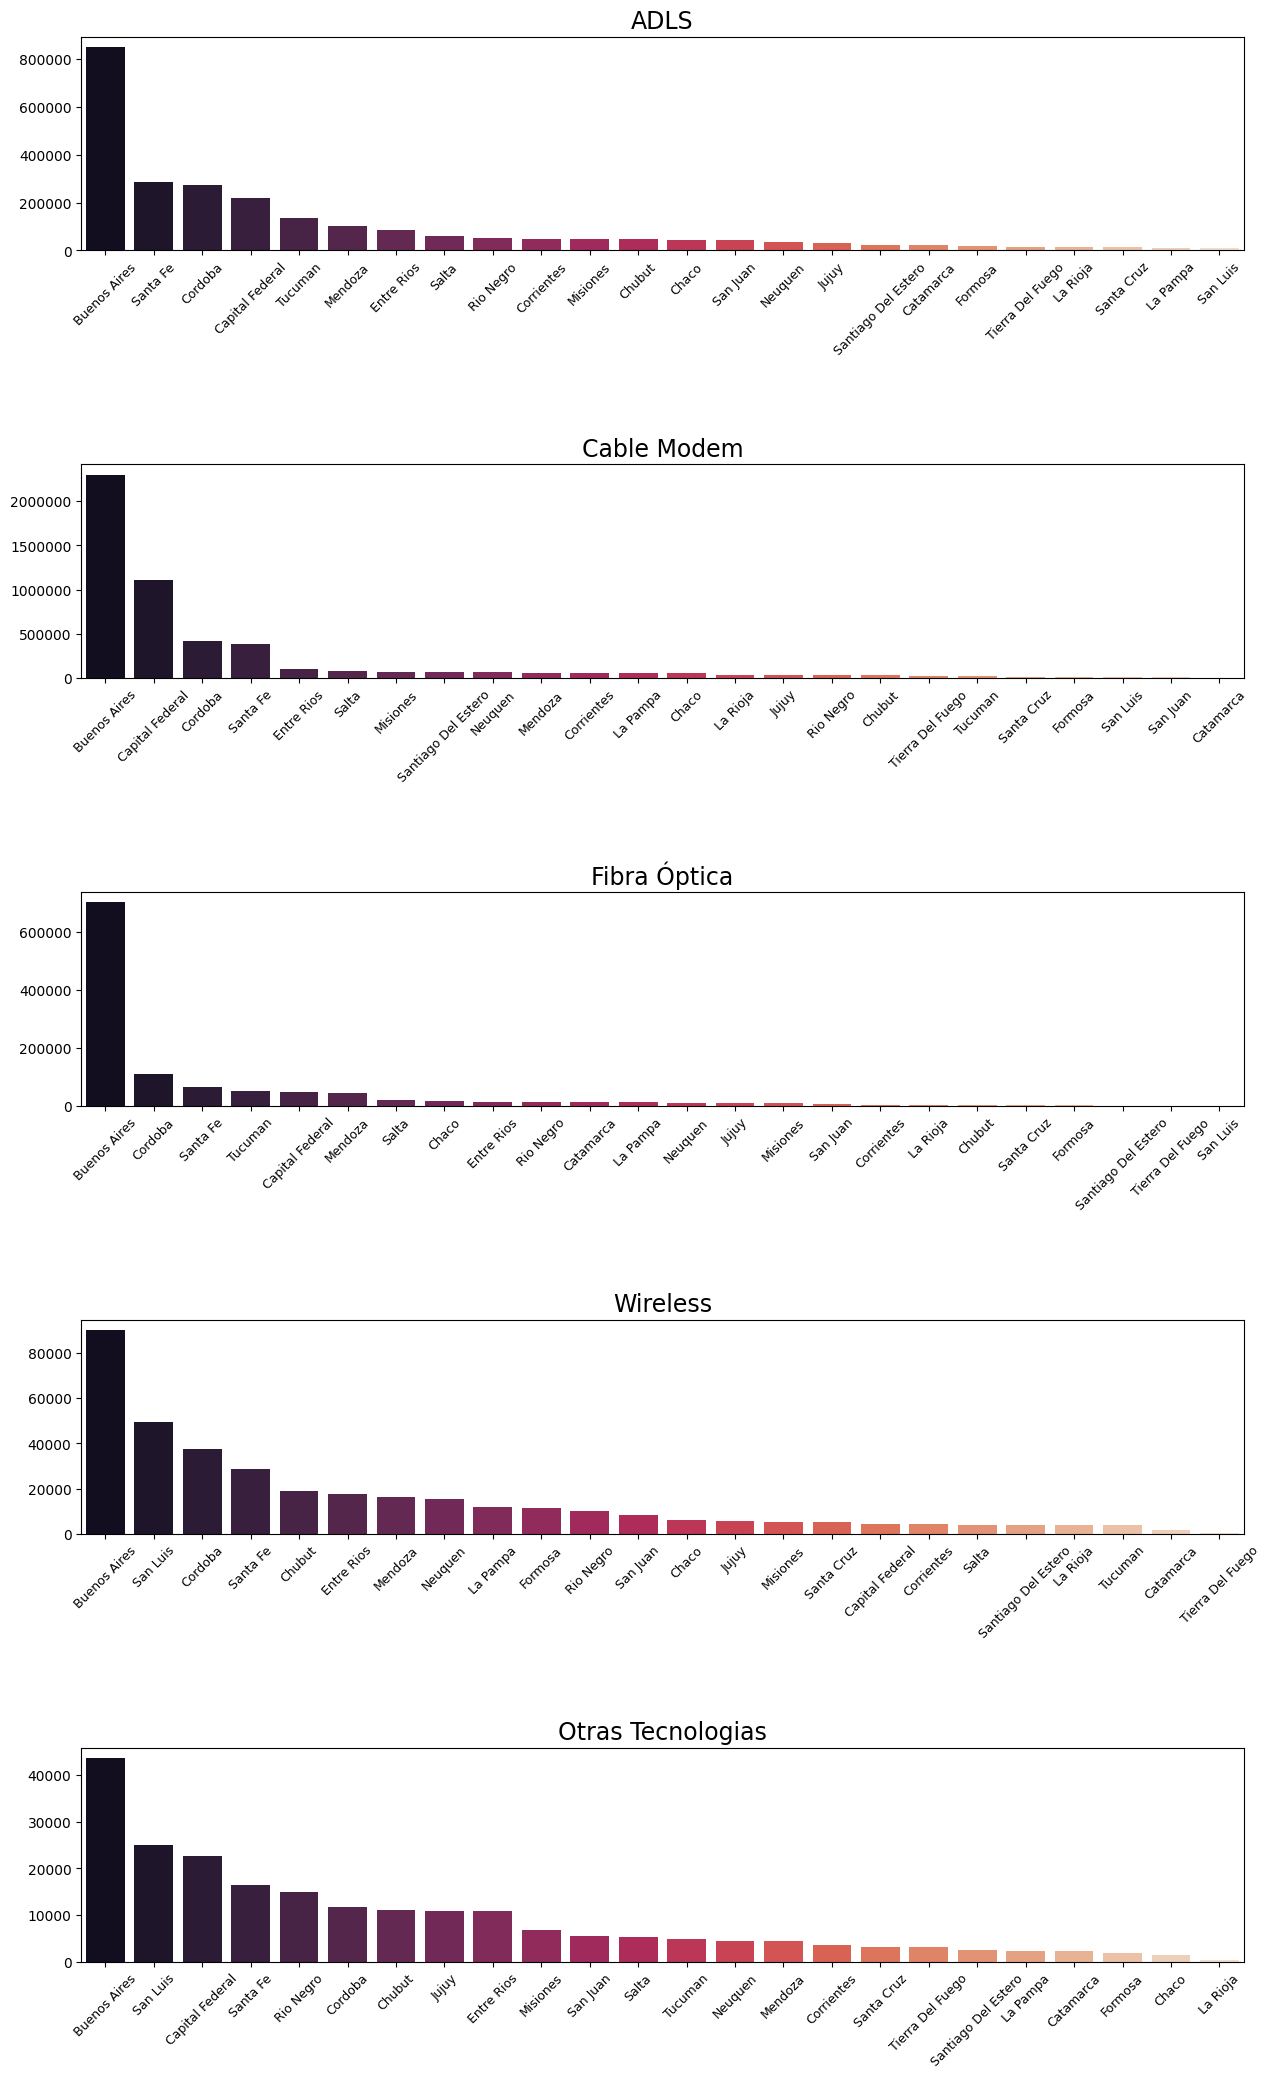

In [197]:
dfTopProvincias = dfProvincias.groupby(by=['provincia']).mean().reset_index()
fig, axes = plt.subplots(nrows=5, figsize=(15,25))

#ADLS
sns.barplot(data=dfTopProvincias.sort_values(by='adsl', ascending=False),
            x='provincia', y='adsl', ax=axes[0], palette="rocket")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=9)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_title('ADLS', fontsize=17)
axes[0].set_ylabel('')
axes[0].set_xlabel('')

#Cablemodem
sns.barplot(data=dfTopProvincias.sort_values(by='cablemodem', ascending=False),
            x='provincia', y='cablemodem', ax=axes[1], palette="rocket")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=9)
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_title('Cable Modem', fontsize=17)
axes[1].set_ylabel('')
axes[1].set_xlabel('')

#Fibra Óptica
sns.barplot(data=dfTopProvincias.sort_values(by='fibra_optica', ascending=False),
            x='provincia', y='fibra_optica',ax=axes[2], palette="rocket")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, fontsize=9)
axes[2].ticklabel_format(style='plain', axis='y')
axes[2].set_title('Fibra Óptica', fontsize=17)
axes[2].set_ylabel('')
axes[2].set_xlabel('')

#Wireless
sns.barplot(data=dfTopProvincias.sort_values(by='wireless', ascending=False),
            x='provincia', y='wireless',ax=axes[3], palette="rocket")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, fontsize=9)
axes[3].ticklabel_format(style='plain', axis='y')
axes[3].set_title('Wireless', fontsize=17)
axes[3].set_ylabel('')
axes[3].set_xlabel('')

#Otras Tecnologias
sns.barplot(data=dfTopProvincias.sort_values(by='otras_tecnologias', ascending=False),
            x='provincia', y='otras_tecnologias',ax=axes[4], palette="rocket")
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=45, fontsize=9)
axes[4].ticklabel_format(style='plain', axis='y')
axes[4].set_title('Otras Tecnologias', fontsize=17)
axes[4].set_ylabel('')
axes[4].set_xlabel('')

fig.subplots_adjust(hspace=1, wspace=0.3)

- Mapa de Nros. de Accesos por Tecnología de Fibra óptica - Por Provincias

In [214]:
fig = px.choropleth_mapbox(dfMapa, 
    geojson=data, 
    featureidkey='properties.nombre', 
    locations='provincia', 
    color='fibra_optica',
    mapbox_style="carto-positron",
    center = {"lat": -38.40, "lon": -63.60},
    zoom=3,
    opacity=1,
    hover_data=['poblacion','fibra_optica'],
    labels={'fibra_optica':'Fibra Optica'},
)

fig.add_scattergeo(
    geojson=data, 
    featureidkey='properties.nombre',
    locations = dfMapa['provincia'],
    text = dfMapa['provincia'],
    mode = 'text') 

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

- Mapa de Nros. de Accesos por Tecnología Cable Modem - Por Provincias

In [213]:
fig = px.choropleth_mapbox(dfMapa, 
    geojson=data, 
    featureidkey='properties.nombre', 
    locations='provincia', 
    color='cablemodem',
    mapbox_style="carto-positron",
    center = {"lat": -38.40, "lon": -63.60},
    zoom=3,
    opacity=1,
    hover_data=['poblacion','cablemodem'],
    labels={'cablemodem':'Cable Modem'},
)

fig.add_scattergeo(
    geojson=data, 
    featureidkey='properties.nombre',
    locations = dfMapa['provincia'],
    text = dfMapa['provincia'],
    mode = 'text') 

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**OBSERVACIONES**

- Las 5 Provincias con mayores accesos a la Tecnología ADSL son: Buenos Aires, Santa Fe, Córdoba, Capital Federal y Tucumán.
- Las 5 Provincias con mayores accesos a la Tecnología Cable Modem son: Buenos Aires, Capital Federal, Córdoba, Santa Fe y Entre Ríos.
- Las 5 Provincias con mayores accesos a la Tecnología de Fibra óptica son: Buenos Aires, Córdoba, Santa Fe, Tucumán y Capital Federal.
- Las 5 Provincias con mayores accesos a la Tecnología Wireless son: Buenos Aires, San Luis, Córdoba, Santa Fe, Chubut y Entre Ríos.
- Las 5 Provincias con mayores accesos a la Otras Tecnologías son: Buenos Aires, San Luis, Capital Federal, Santa Fe, Chubut y Rio Negro.

- En resumen, la Provincia de Buenos Aires tiene el mayor número de accesos por Cable Modem y Fibra óptica. Es importante acotar que las provincias más alejadas como Tierra del Fuego, Santa Cruz y Formosa tienen un bajo número de accesos a tecnología de Cable Modem y Fibra óptica, posiblemente se deba tanto a la distancia como a la poca población de dichas Provincias por lo cual una inversión en infraestructura sea muy elevada.